# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 5.2 MB/s eta 0:00:00


In [ ]:
import random
import math
import numpy as np
from sklearn import preprocessing

import os
import pandas as pd
import zipfile

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras_tuner import Hyperband, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
import os
import random
import math
import numpy as np
from sklearn import preprocessing


import pandas as pd
import zipfile

import pandas as pd
from datetime import datetime, timedelta
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


import tensorflow as tf


from keras_tuner import Hyperband, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error




import random
import math
import numpy as np
from sklearn import preprocessing


import pandas as pd
import zipfile

import pandas as pd
from datetime import datetime, timedelta


from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Bidirectional, LSTM






# Load the data

In [ ]:
bh=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Bhadla solar Power Park/27.420177_72.070427_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
ch=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Charan Solar Park/23.902077_71.19477_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
dh=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Dhirubhai Ambani/26.793418_72.009013_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
kam=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Kamuthi Solar Park/9.415969_78.248047_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
kaz=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/32.2275_78.07099_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
kur=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Kurnool/15.855387_78.065199_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
man=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Mandsur Solar Farm/23.986373_75.32641_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
pava=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Pavagada Solar park/14.138196_77.314631_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
pha=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Phalodi_Solar_Park/27.294_72.365_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
rew=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Rewa Ultra Mega Solar/24.630418_81.537174_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
sak=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/21.085624_74.352948_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
tan=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/33.9608_78.0579_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)

# Data Processing

In [ ]:
class DateTimeConverter:
    def __init__(self, data):
        self.data = data
    def add_month_hour_columns(self):
      self.data['Month']=pd.to_datetime(self.data['PeriodStart']).dt.month
      self.data['Hour']=pd.to_datetime(self.data['PeriodStart']).dt.hour
    def add_features(self):
      self.data = pd.get_dummies(self.data, columns=['Month'])
      self.data['sin_hour'] = np.sin(2*np.pi*self.data['Hour'].astype(int)/24)
      self.data['cos_hour'] = np.cos(2*np.pi*self.data['Hour'].astype(int)/24)
    def visualize_transformations(self):
      fig, ax = plt.subplots()
      ax.plot(self.data['Hour'].iloc[:96], self.data['Ghi'].iloc[:96]/1000, label='Solar Irradiance')
      ax.plot(self.data['Hour'].iloc[:96], self.data['sin_hour'].iloc[:96], label='Sine of Hour')
      ax.plot(self.data['Hour'].iloc[:96], self.data['cos_hour'].iloc[:96], label='Cosine of Hour')
      ax.set_xlabel('Hour of Day')
      ax.set_ylabel('Value')
      ax.set_title('Solar Irradiance and Time of Day Transformations')
      ax.legend()
      plt.show()

    def remove_features(self):
      self.data.drop(['Year', 'Day', 'Minute', 'Hour','Clearsky GHI', 'DHI', 'DNI', 'Clearsky DHI', 'Clearsky DNI','Fill Flag'],inplace=True,axis=1)
    
    def get_data(self):
      return self.data



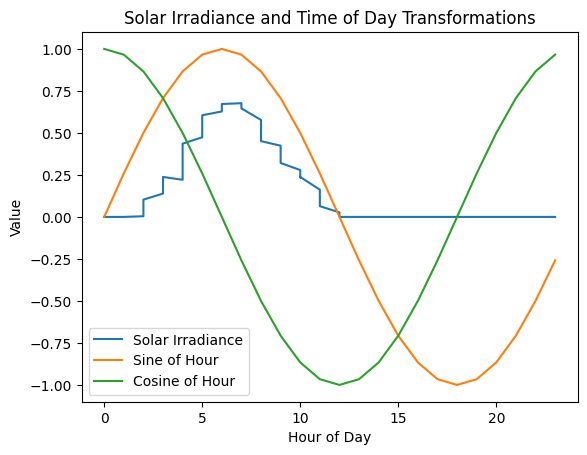

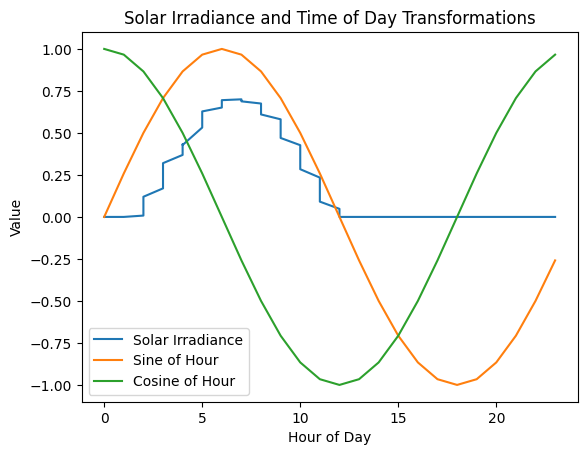

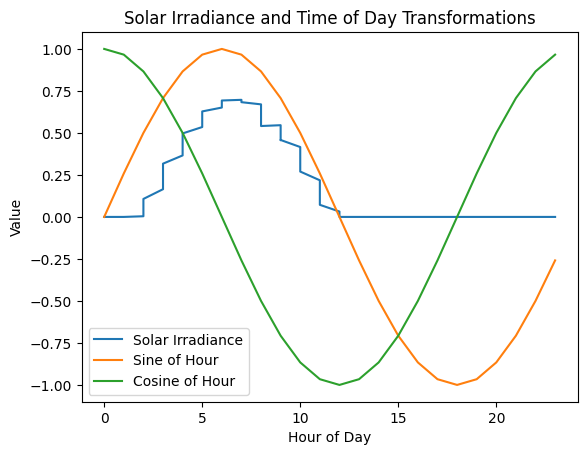

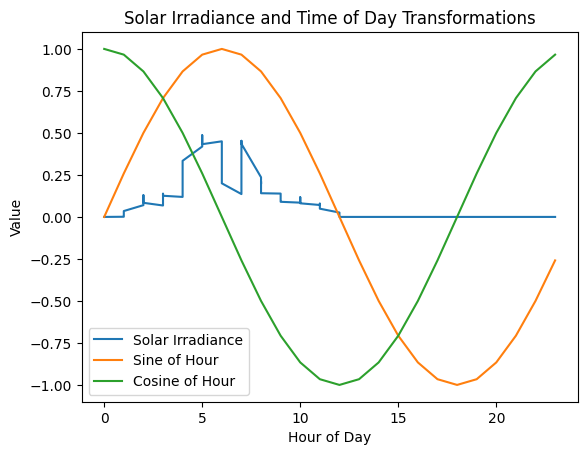

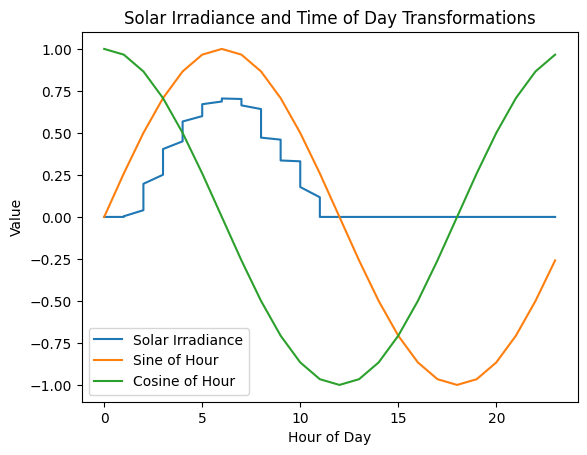

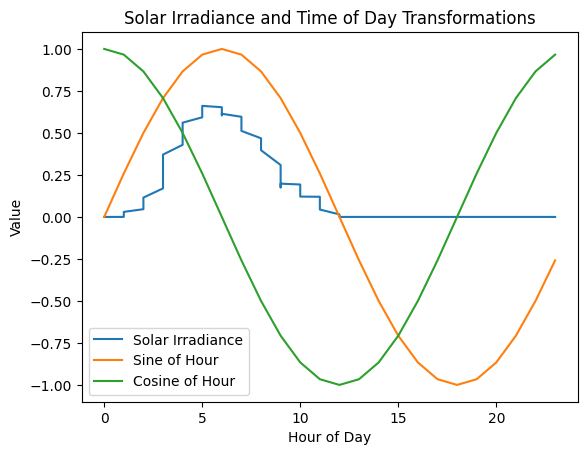

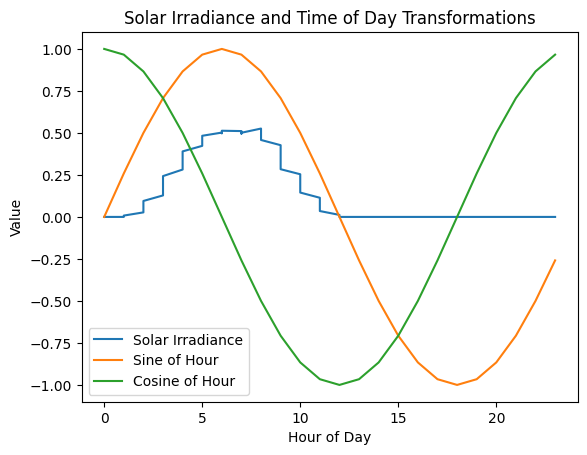

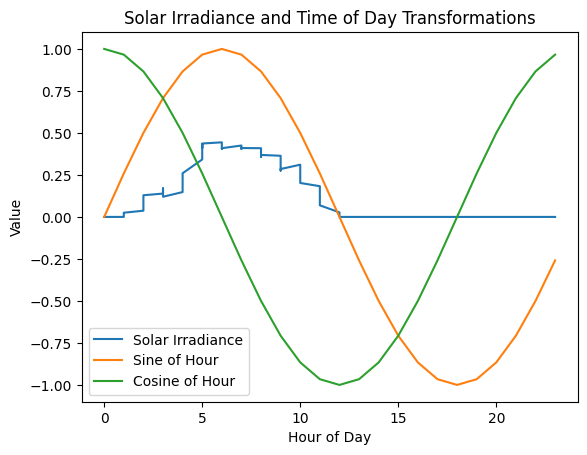

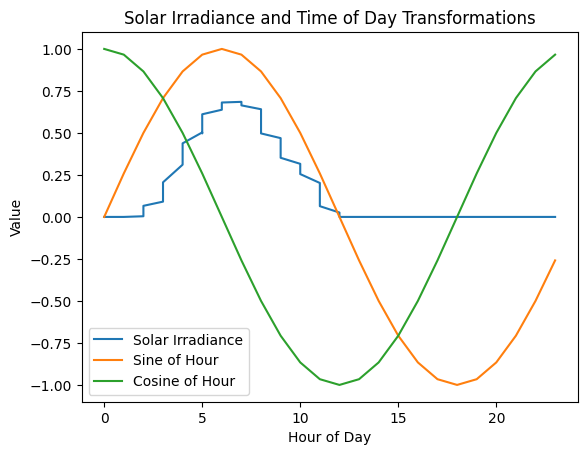

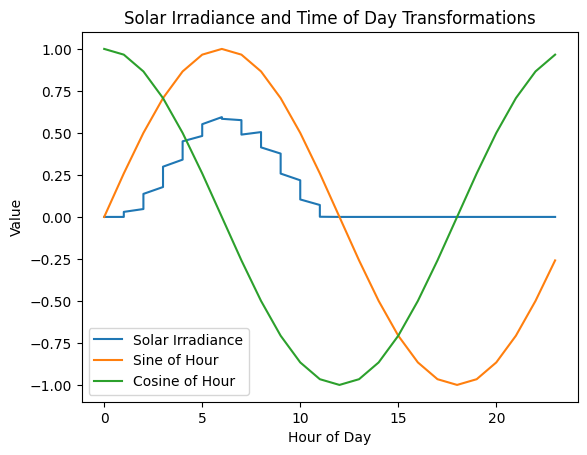

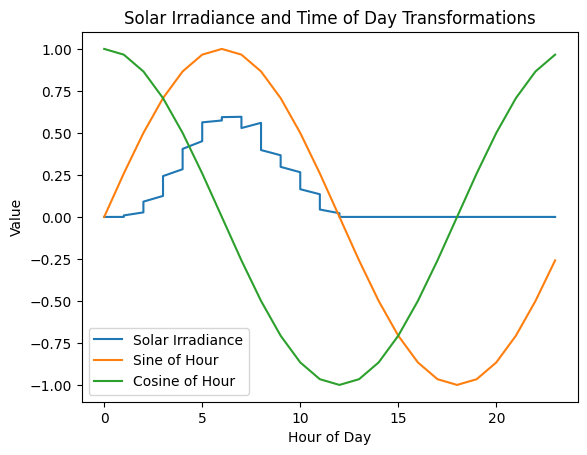

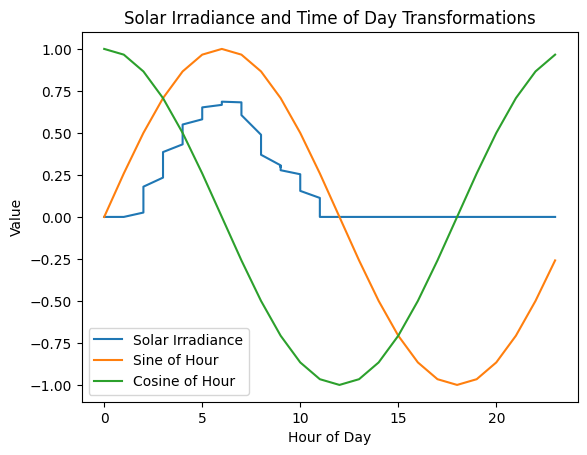

In [ ]:
# bh
dt_converter = DateTimeConverter(bh)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
bh=dt_converter.get_data()
# ch
dt_converter = DateTimeConverter(ch)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
ch=dt_converter.get_data()
# dh
dt_converter = DateTimeConverter(dh)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
dh=dt_converter.get_data()
# kam
dt_converter = DateTimeConverter(kam)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
kam=dt_converter.get_data()
# kaz
dt_converter = DateTimeConverter(kaz)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
kaz=dt_converter.get_data()
# kur
dt_converter = DateTimeConverter(kur)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
kur=dt_converter.get_data()
# man
dt_converter = DateTimeConverter(man)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
man=dt_converter.get_data()
# pava
dt_converter = DateTimeConverter(pava)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
pava=dt_converter.get_data()
# pha
dt_converter = DateTimeConverter(pha)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
pha=dt_converter.get_data()
# rew
dt_converter = DateTimeConverter(rew)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
rew=dt_converter.get_data()
# sak
dt_converter = DateTimeConverter(sak)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
sak=dt_converter.get_data()
# tan
dt_converter = DateTimeConverter(tan)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
tan=dt_converter.get_data()


# Checking the variance of the data

In [ ]:
class SolarIrradianceMetrics:
    def __init__(self, data_file):
        self.data = data_file
        self.Irradiance = self.data['Ghi']

    def get_mean(self):
        return np.mean(self.Irradiance)

    def get_iqr(self):
        q1 = np.percentile(self.Irradiance, 25)
        q3 = np.percentile(self.Irradiance, 75)
        return q3 - q1

    def get_std_dev(self):
        return np.std(self.Irradiance)

    def plot_histogram(self):
        plt.hist(self.Irradiance, bins=50)
        plt.title('Distribution of Solar Irradiance Data')
        plt.xlabel('Irradiance (w/m^2)')
        plt.ylabel('Frequency')
        plt.show()

    def plot_boxplot(self):
        plt.boxplot(self.Irradiance)
        plt.title('Boxplot of Solar Irradiance Data')
        plt.xlabel('Irradiance (w/m^2)')
        plt.show()

    def plot_stats(self):
        mean = self.get_mean()
        iqr = self.get_iqr()
        std_dev = self.get_std_dev()

        fig, ax = plt.subplots()
        ax.bar(['Mean', 'IQR', 'Std. Dev.'], [mean, iqr, std_dev])
        ax.set_title('Statistics of Solar Irradiance Data')
        ax.set_ylabel('Irradiance (W/m^2)')
        plt.show()


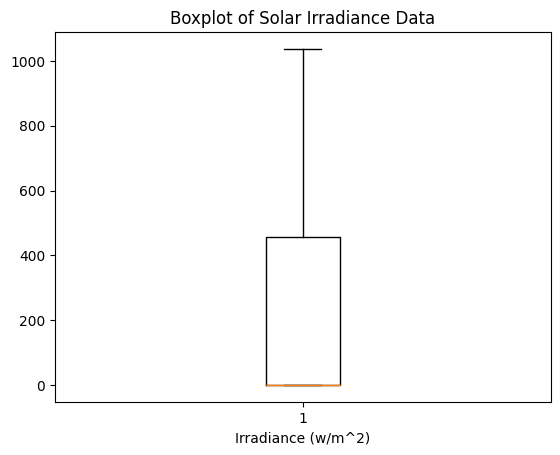

Stnadard Deviation :- 300.776681824732
Inter-quartile Range :- 455.0
Mean :- 220.87882733585857


In [ ]:
sm=SolarIrradianceMetrics(bh)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

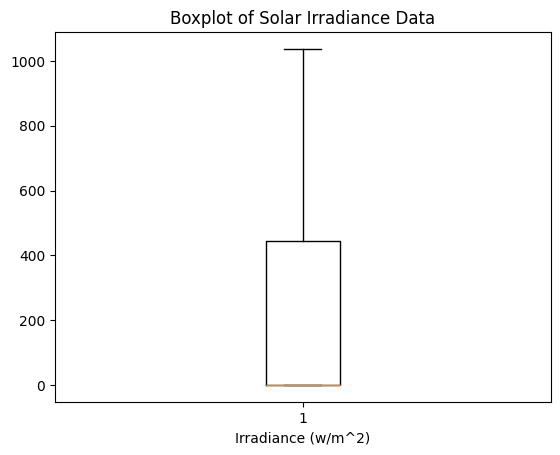

Stnadard Deviation :- 299.4462966874787
Inter-quartile Range :- 443.25
Mean :- 218.87026515151516


In [ ]:
sm=SolarIrradianceMetrics(ch)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

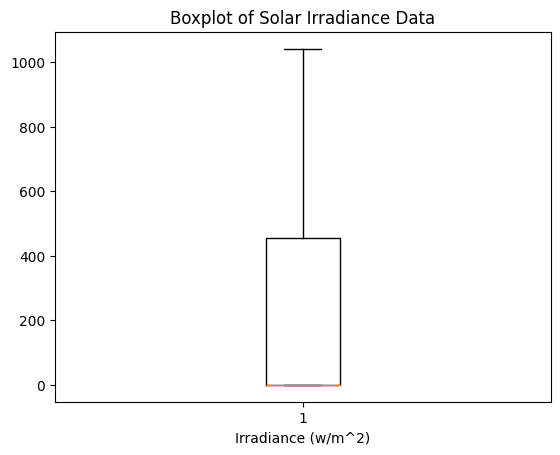

Stnadard Deviation :- 303.24702833181635
Inter-quartile Range :- 456.0
Mean :- 222.03224957912457


In [ ]:
sm=SolarIrradianceMetrics(dh)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

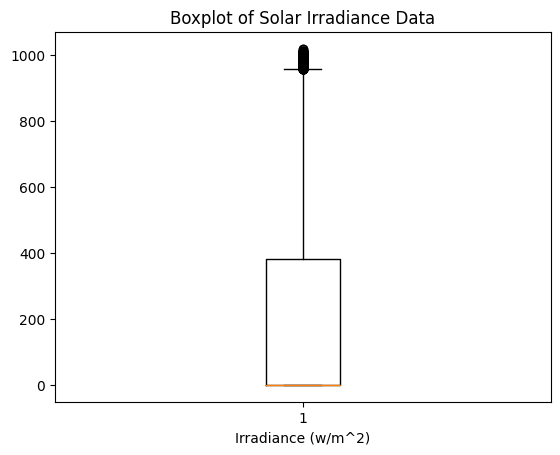

Stnadard Deviation :- 290.02785081617975
Inter-quartile Range :- 383.0
Mean :- 204.68711858164983


In [ ]:
sm=SolarIrradianceMetrics(kam)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

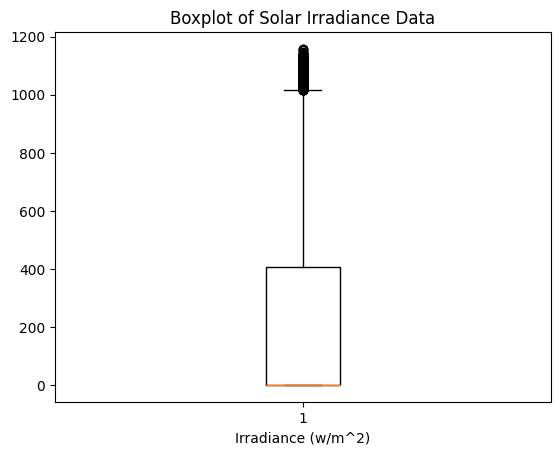

Stnadard Deviation :- 310.9372758982954
Inter-quartile Range :- 407.0
Mean :- 221.69787720959596


In [ ]:
sm=SolarIrradianceMetrics(kaz)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

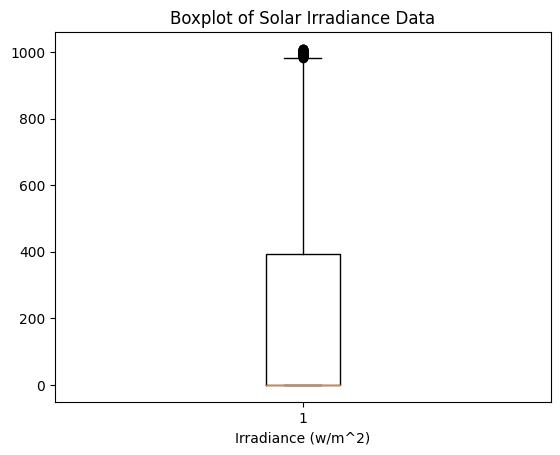

Stnadard Deviation :- 292.4554611962433
Inter-quartile Range :- 393.0
Mean :- 207.43233112373738


In [ ]:
sm=SolarIrradianceMetrics(kur)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

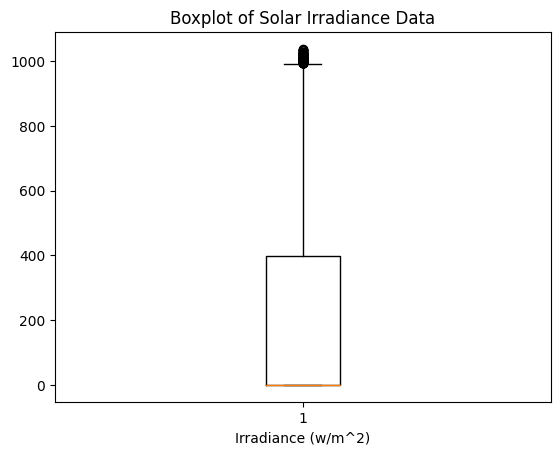

Stnadard Deviation :- 293.2598505729882
Inter-quartile Range :- 397.0
Mean :- 206.58691077441077


In [ ]:
sm=SolarIrradianceMetrics(man)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

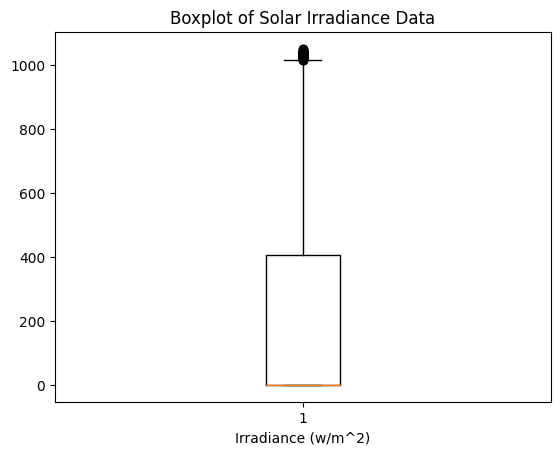

Stnadard Deviation :- 300.8688450373308
Inter-quartile Range :- 406.25
Mean :- 214.91398358585857


In [ ]:
sm=SolarIrradianceMetrics(pava)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

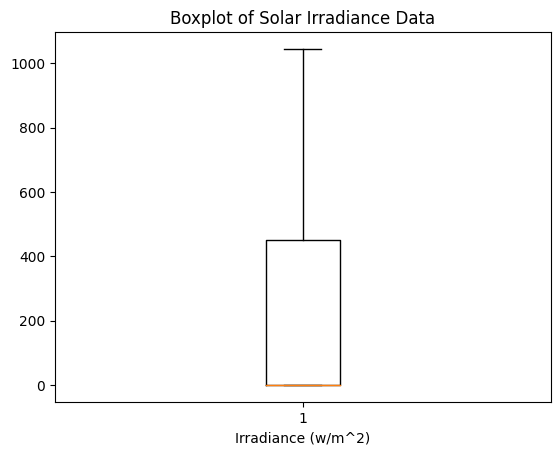

Stnadard Deviation :- 300.6777040313171
Inter-quartile Range :- 451.0
Mean :- 220.29261363636363


In [ ]:
sm=SolarIrradianceMetrics(pha)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

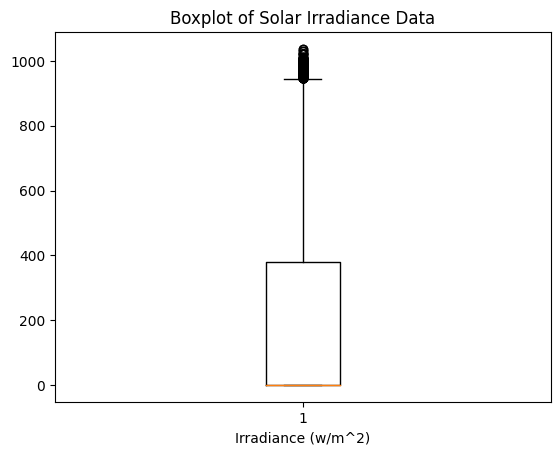

Stnadard Deviation :- 283.85183627053846
Inter-quartile Range :- 378.0
Mean :- 198.93054240319864


In [ ]:
sm=SolarIrradianceMetrics(rew)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

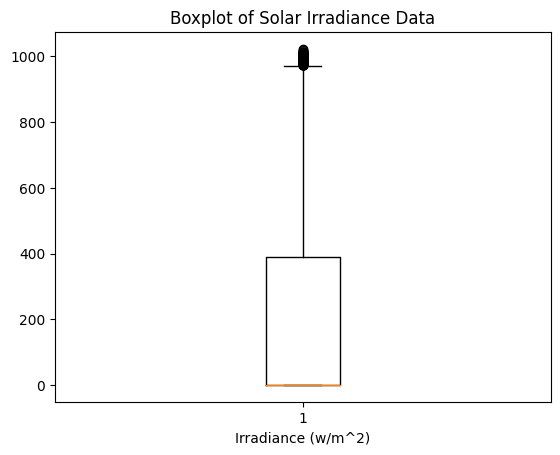

Stnadard Deviation :- 288.5697624045657
Inter-quartile Range :- 389.0
Mean :- 204.15330387205387


In [ ]:
sm=SolarIrradianceMetrics(sak)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

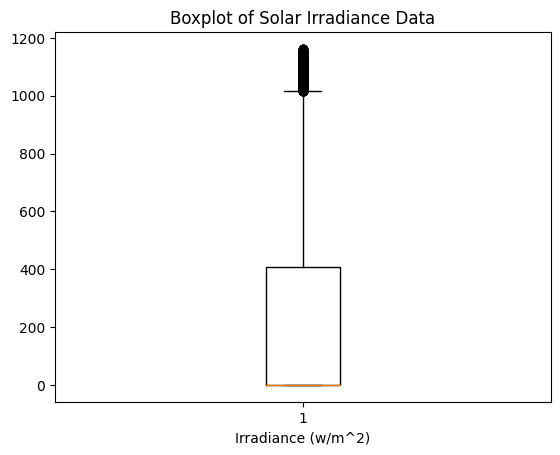

Stnadard Deviation :- 305.13550593345474
Inter-quartile Range :- 407.0
Mean :- 220.37240898569024


In [ ]:
sm=SolarIrradianceMetrics(tan)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

# Finding Optimal Time steps Lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

class AutocorrelationAnalyzer:
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def calculate_acf(self, lags=None):
        if lags is None:
            lags = len(self.data) - 1
        acf_values = pd.Series(self.data[self.column_name]).autocorr(lag=lags)
        return acf_values

    def plot_acf(self, lags=None):
        if lags is None:
            lags = len(self.data) - 1
        fig, ax = plt.subplots(figsize=(10, 6))
        plot_acf(self.data[self.column_name], lags=lags, ax=ax)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('Autocorrelation Function')
        plt.show()

Autocorrelation at lag 4: 0.930416574132719


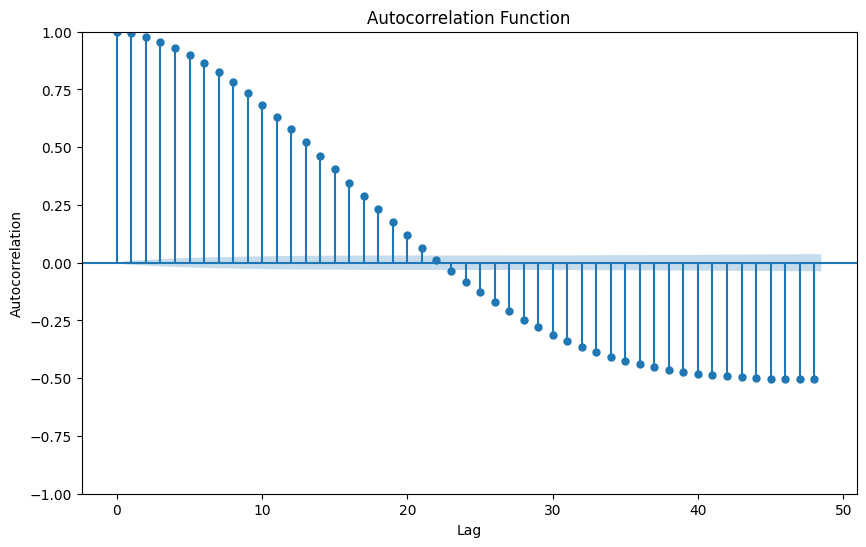

In [ ]:




# Replace 'irradiance' with the name of the column containing your irradiance data
column_name = 'Ghi'

# Create an AutocorrelationAnalyzer instance
analyzer = AutocorrelationAnalyzer(kaz, column_name)

# Calculate and print the autocorrelation for a specific lag (e.g., 4)
lag = 4
print(f"Autocorrelation at lag {lag}: {analyzer.calculate_acf(lag)}")

# Plot the autocorrelation function for the time series
lags_to_plot = 48  # Adjust this value as needed
analyzer.plot_acf(lags_to_plot)

In [ ]:
lag = 96
print(f"Autocorrelation at lag {lag}: {analyzer.calculate_acf(lag)}")

Autocorrelation at lag 96: 0.9121131977606574


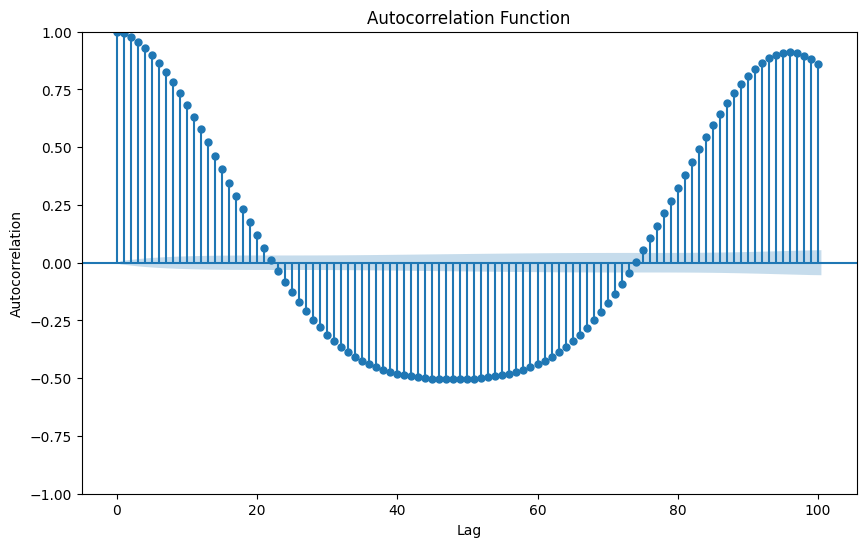

In [ ]:
# Plot the autocorrelation function for the time series
lags_to_plot = 100  # Adjust this value as needed
analyzer.plot_acf(lags_to_plot)

# Data Spliting

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

class SplitData:

    def __init__(self,data,n_timesteps, n_outputs, only_production=False):
        # Read data from csv
        self.df=data
        # self.train=train
        # self.test=test

        self.train = None
        self.test = None

        self.x_train = None
        self.y_train = None

        self.x_test = None
        self.y_test = None

        self.only_production = only_production
        self.lag = n_timesteps

        self.n_features = None
        self.num_of_outputs = n_outputs
        
        self.cols = self.df.columns


    def split_sequences(self, sequences):
        X, y = list(), list()
        for i in range(len(sequences)):
            # find the end of this pattern 
            end_ix = i + self.lag
            # check if we are beyond the dataset
            if end_ix > len(sequences):
                break
            # gather input and output parts of the pattern
            if self.only_production:
                seq_x, seq_y = sequences[i:end_ix, -1], sequences[end_ix:(end_ix+self.num_of_outputs), -1]
            else:
                seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:(end_ix+self.num_of_outputs),-1]
            X.append(seq_x)
            y.append(seq_y)
        return (np.array(X), np.array(y))

    def unique_shapes(self,x, y, lag_, n_features_, num_of_outputs_, only_production):
        uniuqe_shapes = []
        for k in range(len(x)):
            if only_production==True:
                if (x[k].shape == (lag_,)) & (y[k].shape == (num_of_outputs_,)):
                    uniuqe_shapes.append(k)
            else:
                if (x[k].shape == (lag_, n_features_)) & (y[k].shape == (num_of_outputs_,)):
                    uniuqe_shapes.append(k)       
        x = x[uniuqe_shapes]
        y = y[uniuqe_shapes]
        x = np.stack(x)
        y = np.stack(y)
        return (x, y)
    def preprocess_data(self):
        # Select non-correlated variables and perform One-Hot-Encoding to Months and Sin-Cos Similarities to Hours
        self.n_features = len(self.cols)

        feature_index = self.df.columns.get_loc('Ghi')

        # Pop the feature from its current position
        df_feature = self.df.pop('Ghi')

        # Insert the feature at the last index
        self.df.insert(len(self.df.columns), 'Ghi', df_feature)

        # Set the training data range

        train_start_4 = "2022-07-31T00:00:00Z"
        train_end_4 = "2022-12-31T23:45:00Z"

        # Set the training data range
        train_start_8 = "2022-03-31T00:00:00Z"
        train_end_8 = "2022-12-31T23:45:00Z"

        # Set the training data range
        train_start_12 = "2021-12-31T00:00:00Z"
        train_end_12 = "2022-12-31T23:45:00Z"


        # Set the test data range
        test_start = "2022-12-31T23:45:00Z"

        # Convert the 'PeriodStart' column to a datetime format
        self.df['PeriodStart'] = pd.to_datetime(self.df['PeriodStart'])

        # Split the data into train and test sets based on the date and time range
        self.train_4 = self.df[(self.df['PeriodStart'] >= train_start_4) & (self.df['PeriodStart'] <= train_end_4)]
        self.train_8 = self.df[(self.df['PeriodStart'] >= train_start_8) & (self.df['PeriodStart'] <= train_end_8)]
        self.train_12 = self.df[(self.df['PeriodStart'] >= train_start_12) & (self.df['PeriodStart'] <= train_end_12)]
        self.test = self.df[self.df['PeriodStart'] >= test_start]

        self.x_train_4, self.y_train_4 = self.split_sequences(self.train_4.values)
        self.x_train_8, self.y_train_8 = self.split_sequences(self.train_8.values)
        self.x_train_12, self.y_train_12 = self.split_sequences(self.train_12.values)
        self.x_test, self.y_test = self.split_sequences(self.test.values)

        self.x_train_4, self.y_train_4 = self.unique_shapes(self.x_train_4, self.y_train_4, self.lag, self.n_features, self.num_of_outputs, self.only_production)
        self.x_train_8, self.y_train_8 = self.unique_shapes(self.x_train_8, self.y_train_8, self.lag, self.n_features, self.num_of_outputs, self.only_production)
        self.x_train_12, self.y_train_12 = self.unique_shapes(self.x_train_12, self.y_train_12, self.lag, self.n_features, self.num_of_outputs, self.only_production)
        self.x_test, self.y_test   = self.unique_shapes(self.x_test,  self.y_test,  self.lag, self.n_features, self.num_of_outputs,self.only_production)

        return ((self.x_train_4[:, :, 1:],self.y_train_4),(self.x_train_8[:, :, 1:],self.y_train_8),(self.x_train_12[:, :, 1:],self.y_train_12),(self.x_test[:, :, 1:],self.y_test))



In [ ]:
len(bh.columns)-1

26

In [ ]:
n_timesteps=96
n_features=26
n_outputs=1

## SAK

In [ ]:
sd1=SplitData(sak,n_timesteps,n_outputs,only_production=False)
sak_train_4,sak_train_8,sak_train_12,sak_test=sd1.preprocess_data()
X_train_sak_4,y_train_sak_4=sak_train_4
X_train_sak_8,y_train_sak_8=sak_train_8
X_train_sak_12,y_train_sak_12=sak_train_12
X_test_sak,y_test_sak=sak_test

<ipython-input-8-e15afd5af033>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (np.array(X), np.array(y))


KeyboardInterrupt: ignored

In [ ]:
df_sak=sak.copy()

df_train_4_date_Sak=pd.DataFrame()
df_train_8_date_Sak=pd.DataFrame()
df_train_12_date_Sak=pd.DataFrame()
df_test_date_sak=pd.DataFrame()

train_start_4 = "2022-07-31T00:00:00Z"
train_end_4 = "2022-12-31T23:45:00Z"

# Set the training data range
train_start_8 = "2022-03-31T00:00:00Z"
train_end_8 = "2022-12-31T23:45:00Z"

# Set the training data range
train_start_12 = "2021-12-31T00:00:00Z"
train_end_12 = "2022-12-31T23:45:00Z"


# Set the test data range
test_start = "2022-12-31T23:45:00Z"

# Convert the 'PeriodStart' column to a datetime format
df_sak['PeriodStart'] = pd.to_datetime(df_sak['PeriodStart'])

# Split the data into train and test sets based on the date and time range
df_train_4_date_Sak['Date'] = df_sak[(df_sak['PeriodStart'] >= train_start_4) & (df_sak['PeriodStart'] <= train_end_4)]['PeriodStart']
df_train_8_date_Sak['Date'] = df_sak[(df_sak['PeriodStart'] >= train_start_8) & (df_sak['PeriodStart'] <= train_end_8)]['PeriodStart']
df_train_12_date_Sak['Date']= df_sak[(df_sak['PeriodStart'] >= train_start_12) & (df_sak['PeriodStart'] <= train_end_12)]['PeriodStart']
df_test_date_sak['Date']= df_sak[(df_sak['PeriodStart'] >= test_start)]['PeriodStart']

df_train_4_date_sak=df_train_4_date_Sak.iloc[-len(X_train_sak_4):]
df_train_8_date_sak=df_train_8_date_Sak.iloc[-len(X_train_sak_8):]
df_train_12_date_sak=df_train_12_date_Sak.iloc[-len(X_train_sak_12):]
df_test_date_sak=df_test_date_sak.iloc[-len(X_test_sak):]

## TAN

In [ ]:
sd2=SplitData(tan,n_timesteps,n_outputs,only_production=False)
tan_train_4,tan_train_8,tan_train_12,tan_test=sd2.preprocess_data()
X_train_tan_4,y_train_tan_4=tan_train_4
X_train_tan_8,y_train_tan_8=tan_train_8
X_train_tan_12,y_train_tan_12=tan_train_12
X_test_tan,y_test_tan=tan_test

<ipython-input-8-e15afd5af033>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (np.array(X), np.array(y))


In [ ]:
df_tan=tan.copy()

df_train_4_date_tan=pd.DataFrame()
df_train_8_date_tan=pd.DataFrame()
df_train_12_date_tan=pd.DataFrame()
df_test_date_tan=pd.DataFrame()

train_start_4 = "2022-07-31T00:00:00Z"
train_end_4 = "2022-12-31T23:45:00Z"

# Set the training data range
train_start_8 = "2022-03-31T00:00:00Z"
train_end_8 = "2022-12-31T23:45:00Z"

# Set the training data range
train_start_12 = "2021-12-31T00:00:00Z"
train_end_12 = "2022-12-31T23:45:00Z"


# Set the test data range
test_start = "2022-12-31T23:45:00Z"

# Convert the 'PeriodStart' column to a datetime format
df_tan['PeriodStart'] = pd.to_datetime(df_tan['PeriodStart'])

# Split the data into train and test sets based on the date and time range
df_train_4_date_tan['Date'] = df_tan[(df_tan['PeriodStart'] >= train_start_4) & (df_tan['PeriodStart'] <= train_end_4)]['PeriodStart']
df_train_8_date_tan['Date'] = df_tan[(df_tan['PeriodStart'] >= train_start_8) & (df_tan['PeriodStart'] <= train_end_8)]['PeriodStart']
df_train_12_date_tan['Date']= df_tan[(df_tan['PeriodStart'] >= train_start_12) & (df_tan['PeriodStart'] <= train_end_12)]['PeriodStart']
df_test_date_tan['Date']= df_tan[(df_tan['PeriodStart'] >= test_start)]['PeriodStart']
df_train_4_date_tan=df_train_4_date_tan.iloc[-len(X_train_tan_4):]
df_train_8_date_tan=df_train_8_date_tan.iloc[-len(X_train_tan_8):]
df_train_12_date_tan=df_train_12_date_tan.iloc[-len(X_train_tan_12):]
df_test_date_tan=df_test_date_tan.iloc[-len(X_test_tan):]

# Data Scaling

In [ ]:
X_train_sak_4 = X_train_sak_4.astype('float32')
y_train_sak_4 = y_train_sak_4.astype('float32')

X_train_sak_8 = X_train_sak_8.astype('float32')
y_train_sak_8 = y_train_sak_8.astype('float32')

X_train_sak_12 = X_train_sak_12.astype('float32')
y_train_sak_12 = y_train_sak_12.astype('float32')

X_test_sak = X_test_sak.astype('float32')
y_test_sak = y_test_sak.astype('float32')

In [ ]:
X_train_tan_4 = X_train_tan_4.astype('float32')
y_train_tan_4 = y_train_tan_4.astype('float32')

X_train_tan_8 = X_train_tan_8.astype('float32')
y_train_tan_8 = y_train_tan_8.astype('float32')

X_train_tan_12 = X_train_tan_12.astype('float32')
y_train_tan_12 = y_train_tan_12.astype('float32')

X_test_tan = X_test_tan.astype('float32')
y_test_tan = y_test_tan.astype('float32')

In [ ]:
# Flatten X_train and X_test to 2 dimensions
X_train_flat_sak_4 = X_train_sak_4.reshape(X_train_sak_4.shape[0], -1)
X_train_flat_sak_8= X_train_sak_8.reshape(X_train_sak_8.shape[0], -1)
X_train_flat_sak_12 = X_train_sak_12.reshape(X_train_sak_12.shape[0], -1)
X_test_flat_sak = X_test_sak.reshape(X_test_sak.shape[0], -1)

# Apply MinMaxScaler to flattened arrays
scaler_sak = MinMaxScaler(feature_range=(0,1))
X_train_scaled_sak_4 = scaler_sak.fit_transform(X_train_flat_sak_4)
X_train_scaled_sak_8 = scaler_sak.fit_transform(X_train_flat_sak_8)
X_train_scaled_sak_12 = scaler_sak.fit_transform(X_train_flat_sak_12)
X_test_scaled_sak = scaler_sak.transform(X_test_flat_sak)

# Reshape back to original shape
X_train_sak_4= X_train_scaled_sak_4.reshape(X_train_sak_4.shape)
X_train_sak_8= X_train_scaled_sak_8.reshape(X_train_sak_8.shape)
X_train_sak_12= X_train_scaled_sak_12.reshape(X_train_sak_12.shape)
X_test_sak= X_test_scaled_sak.reshape(X_test_sak.shape)


scaler_y_sak = MinMaxScaler(feature_range=(0,1))
y_train_sak_4 = scaler_y_sak.fit_transform(y_train_sak_4)
y_train_sak_8 = scaler_y_sak.fit_transform(y_train_sak_8)
y_train_sak_12 = scaler_y_sak.fit_transform(y_train_sak_12)
y_test_sak=scaler_y_sak.transform(y_test_sak)

In [ ]:
# Flatten X_train and X_test to 2 dimensions
X_train_flat_tan_4 = X_train_tan_4.reshape(X_train_tan_4.shape[0], -1)
X_train_flat_tan_8= X_train_tan_8.reshape(X_train_tan_8.shape[0], -1)
X_train_flat_tan_12 = X_train_tan_12.reshape(X_train_tan_12.shape[0], -1)
X_test_flat_tan = X_test_tan.reshape(X_test_tan.shape[0], -1)

# Apply MinMaxScaler to flattened arrays
scaler_tan = MinMaxScaler(feature_range=(0,1))
X_train_scaled_tan_4 = scaler_tan.fit_transform(X_train_flat_tan_4)
X_train_scaled_tan_8 = scaler_tan.fit_transform(X_train_flat_tan_8)
X_train_scaled_tan_12 = scaler_tan.fit_transform(X_train_flat_tan_12)
X_test_scaled_tan = scaler_tan.transform(X_test_flat_tan)

# Reshape back to original shape
X_train_tan_4= X_train_scaled_tan_4.reshape(X_train_tan_4.shape)
X_train_tan_8= X_train_scaled_tan_8.reshape(X_train_tan_8.shape)
X_train_tan_12= X_train_scaled_tan_12.reshape(X_train_tan_12.shape)
X_test_tan= X_test_scaled_tan.reshape(X_test_tan.shape)


scaler_y_tan = MinMaxScaler(feature_range=(0,1))
y_train_tan_4 = scaler_y_tan.fit_transform(y_train_tan_4)
y_train_tan_8 = scaler_y_tan.fit_transform(y_train_tan_8)
y_train_tan_12 = scaler_y_tan.fit_transform(y_train_tan_12)
y_test_tan=scaler_y_tan.transform(y_test_tan)

# Solar Irradiance Forecasting Transfer-Learning Model

In [ ]:
from keras.layers import Reshape
class TransferLearningModel:

    def __init__(self, base_model_path, target_regions, n_timesteps, n_features, n_outputs):
        self.base_model_path = base_model_path
        self.target_regions = target_regions
        self.n_timesteps = n_timesteps
        self.n_features = n_features
        self.n_outputs = n_outputs
        self.model = None
        self.history = None

    def build_model_strategy_1(self):
        # Load base model and freeze all layers except last one
        self.model = load_model(self.base_model_path)
        for layer in self.model.layers[:-1]:
            layer.trainable = False

    def build_model_strategy_2(self):
    # Load base model and use it as weight initialization for TL model
      self.model = load_model(self.base_model_path)
    def build_model_strategy_3(self):
    # Load base model and freeze initial layers, add new output layer
      self.model = load_model(self.base_model_path)
      for layer in self.model.layers[:-1]:
          layer.trainable = False
      self.model.layers[-2].trainable = True
      self.model.pop()
      x = self.model.layers[-1].output
      x = Dense(self.n_outputs)(x)
      self.model = Model(inputs=self.model.input, outputs=x)
    def compile_model(self, learning_rate=0.001):
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mse')
        self.model.summary()

    def fit_model(self, train_data, train_labels, val_data, val_labels, batch_size=128 ,epochs=250, patience=10, verbose=1,
                checkpoint_path=None):
        # Define early stopping and model checkpoint callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=verbose, mode='min', restore_best_weights=True)
        if checkpoint_path is not None:
            model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=verbose, save_best_only=True, mode='min')

        # Fit the model
        if checkpoint_path is not None:
            self.history = self.model.fit(train_data, train_labels, validation_split=0.2, batch_size=batch_size, epochs=epochs,
                                        callbacks=[ model_checkpoint,early_stopping], verbose=verbose)
        else:
            self.history = self.model.fit(train_data, train_labels, validation_split=0.2, batch_size=batch_size, epochs=epochs,
                                        callbacks=[model_checkpoint,early_stopping], verbose=verbose)
    def load_trained_model(self, path):
      self.model = load_model(path)

    def plot_loss_history(self):
        train_loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']
        epochs = range(1, len(train_loss) + 1)
        plt.plot(epochs, train_loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def save_trained(self,path):
      self.model.save(path)
    def predict(self, data):
        return self.model.predict(data)


# SAK

## Bi-LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

class SolarPowerForecastingModel:

    def __init__(self, n_timesteps, n_features, n_outputs,Model=None):
        self.n_timesteps = n_timesteps
        self.n_features = n_features
        self.n_outputs = n_outputs
        self.model = Model
        
    def build_model(self):
        self.model = Sequential()
        self.model.add(Bidirectional(LSTM(units=640,return_sequences=True,input_shape=(self.n_timesteps, self.n_features))))
        self.model.add(Bidirectional(LSTM(units=64)))
        self.model.add(Dense(self.n_outputs))
        self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001), metrics=['mae'])
        return self.model
    def train_model(self, X_train, y_train, X_test, y_test, epochs, batch_size):
        mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2, mode='min', restore_best_weights=True)
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping,mc])

    def load_trained_model(self, path):
        self.model = load_model(path)

    def save_trained_model(self, path):
        self.model.save(path)
    
    def predict(self, X):
        return self.model.predict(X)


In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
best_model.build_model()
best_model.train_model(X_train_sak_4, y_train_sak_4, X_test_sak, y_test_sak, epochs=250, batch_size=128)

# Print the model summary
best_model.model.summary()

Epoch 1/250
92/92 [==============================] - ETA: 0s - loss: 0.0470 - mae: 0.1062
Epoch 1: val_loss improved from inf to 0.00204, saving model to /content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5
92/92 [==============================] - 23s 149ms/step - loss: 0.0470 - mae: 0.1062 - val_loss: 0.0020 - val_mae: 0.0330
Epoch 2/250
92/92 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0356
Epoch 2: val_loss did not improve from 0.00204
92/92 [==============================] - 12s 130ms/step - loss: 0.0034 - mae: 0.0356 - val_loss: 0.0022 - val_mae: 0.0387
Epoch 3/250
92/92 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0304
Epoch 3: val_loss improved from 0.00204 to 0.00195, saving model to /content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5
92/92 [==============================] - 13s 137ms/step - loss: 0.0027 - mae: 0.0304 - val_loss: 0.0019 - val_mae: 0.0367
Epoch

181/181 [==============================] - 4s 18ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

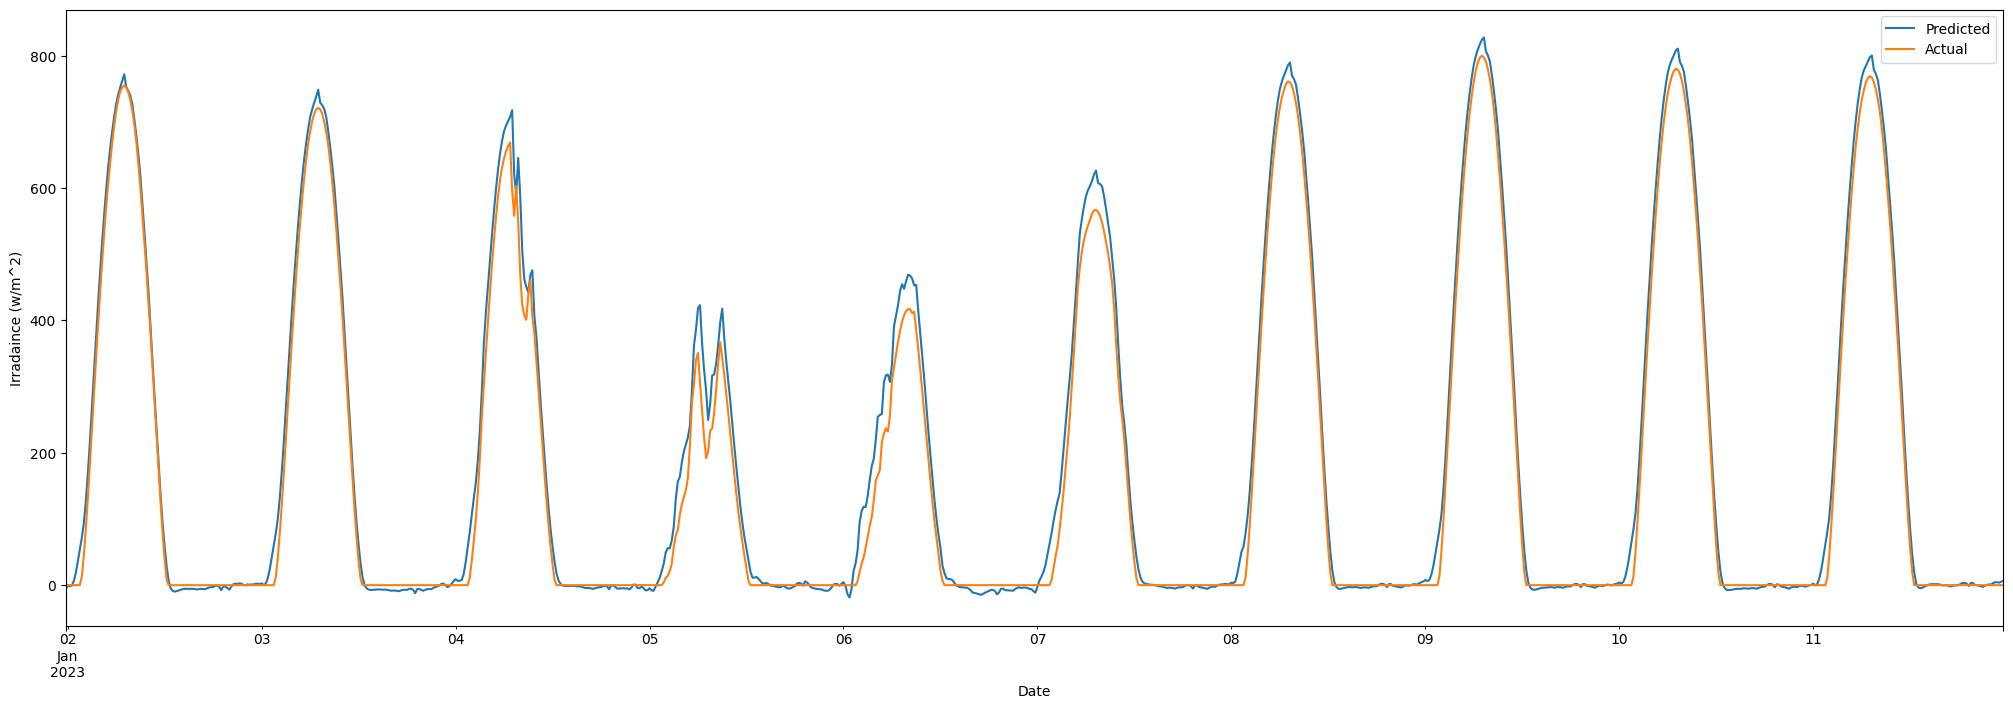

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(best_model.predict(X_test_sak))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))

181/181 [==============================] - 3s 19ms/step
r2_Score 0.9915479461018168
Root Mean Sqaured Error 27.670784
Mean Absolute Error 21.169123


In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
best_model.build_model()
best_model.train_model(X_train_sak_8, y_train_sak_8, X_test_sak, y_test_sak, epochs=250, batch_size=128)

# Print the model summary
best_model.model.summary()

Epoch 1/250
165/165 [==============================] - ETA: 0s - loss: 0.0282 - mae: 0.0755
Epoch 1: val_loss improved from inf to 0.00099, saving model to /content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5
165/165 [==============================] - 33s 149ms/step - loss: 0.0282 - mae: 0.0755 - val_loss: 9.9259e-04 - val_mae: 0.0228
Epoch 2/250
165/165 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0296
Epoch 2: val_loss improved from 0.00099 to 0.00084, saving model to /content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5
165/165 [==============================] - 21s 130ms/step - loss: 0.0025 - mae: 0.0296 - val_loss: 8.3551e-04 - val_mae: 0.0216
Epoch 3/250
165/165 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0259
Epoch 3: val_loss did not improve from 0.00084
165/165 [==============================] - 22s 132ms/step - loss: 0.0020 - mae: 0.0259 - val_loss: 9.7045e-04

181/181 [==============================] - 5s 18ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

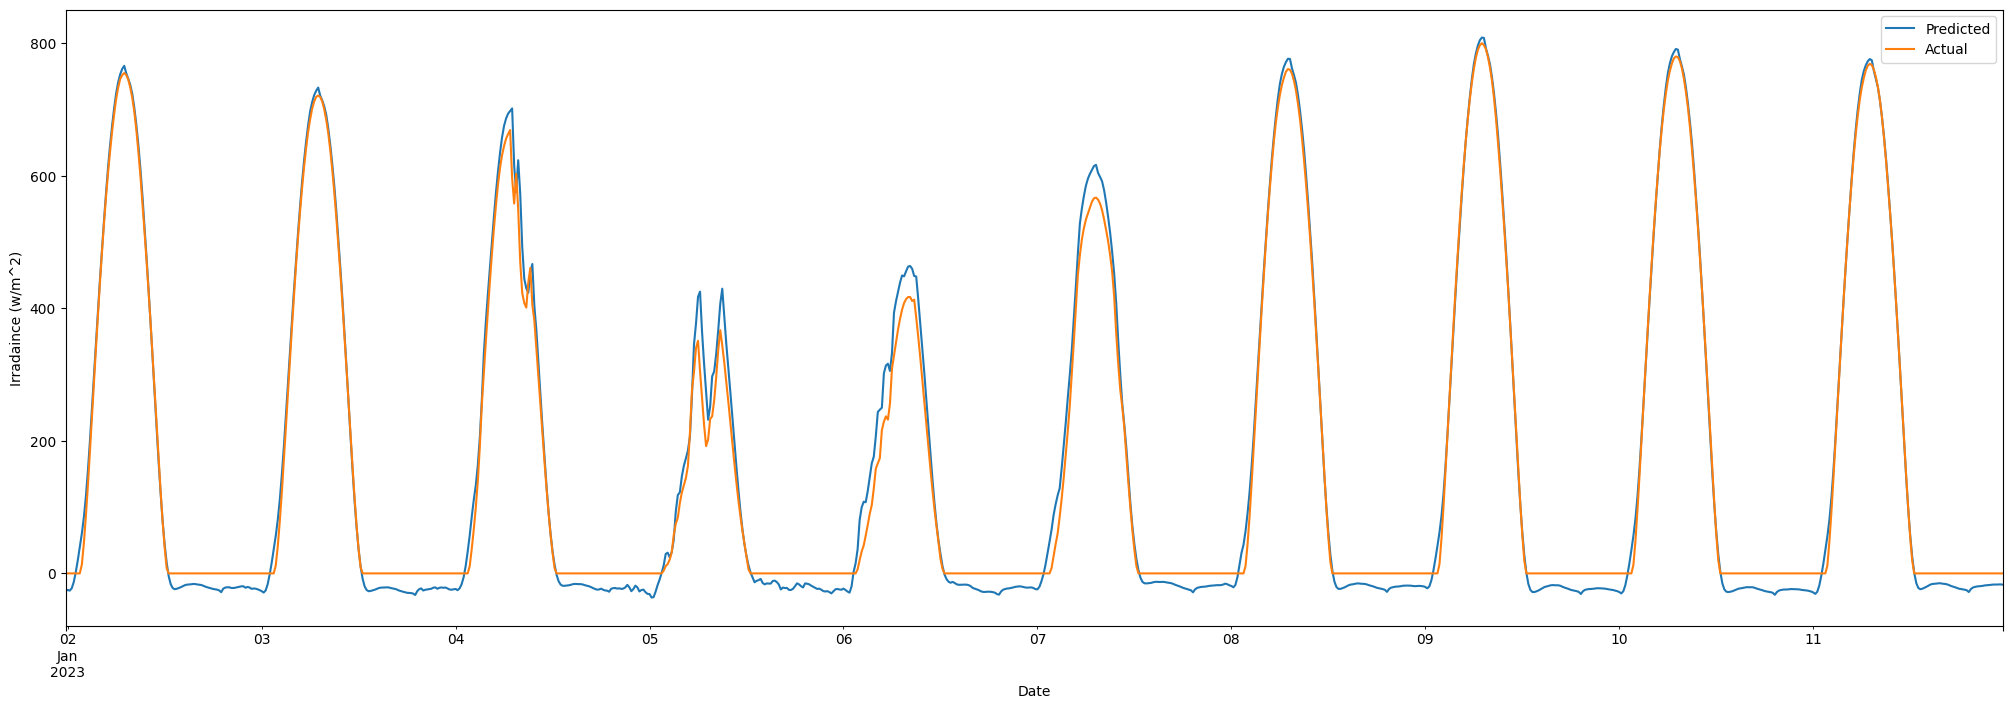

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(best_model.predict(X_test_sak))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))

181/181 [==============================] - 3s 18ms/step
r2_Score 0.9934370203822556
Root Mean Sqaured Error 25.158846
Mean Absolute Error 18.882313


In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
best_model.build_model()
best_model.train_model(X_train_sak_12, y_train_sak_12, X_test_sak, y_test_sak, epochs=250, batch_size=128)

# Print the model summary
best_model.model.summary()

Epoch 1/250
219/219 [==============================] - ETA: 0s - loss: 0.0212 - mae: 0.0615
Epoch 1: val_loss improved from inf to 0.00217, saving model to /content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5
219/219 [==============================] - 40s 148ms/step - loss: 0.0212 - mae: 0.0615 - val_loss: 0.0022 - val_mae: 0.0359
Epoch 2/250
219/219 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0255
Epoch 2: val_loss improved from 0.00217 to 0.00174, saving model to /content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/Bi-LSTM/Best_base.h5
219/219 [==============================] - 28s 128ms/step - loss: 0.0019 - mae: 0.0255 - val_loss: 0.0017 - val_mae: 0.0334
Epoch 3/250
219/219 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0219
Epoch 3: val_loss did not improve from 0.00174
219/219 [==============================] - 28s 126ms/step - loss: 0.0015 - mae: 0.0219 - val_loss: 0.0018 - val_mae: 

181/181 [==============================] - 4s 18ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

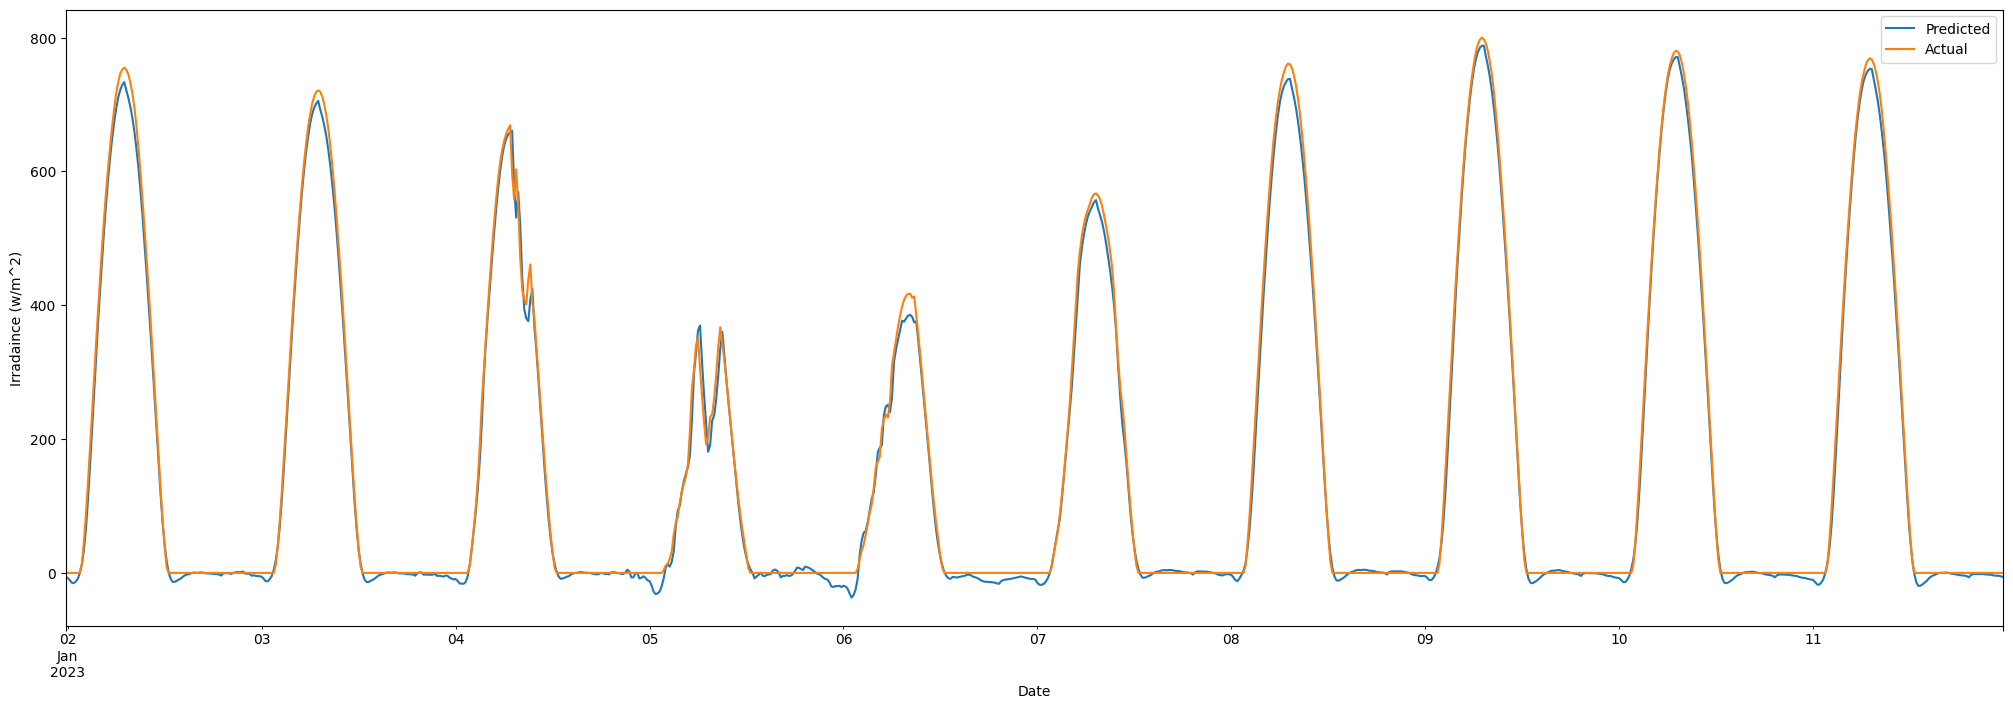

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(best_model.predict(X_test_sak))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))

181/181 [==============================] - 3s 18ms/step
r2_Score 0.9967381595410814
Root Mean Sqaured Error 16.678698
Mean Absolute Error 11.675902


## Persistance model

In [ ]:
sak

,PeriodStart,AirTemp,Azimuth,CloudOpacity,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sin_hour,cos_hour,Ghi
0,2020-12-31 00:00:00+00:00,13.3,-108,0.0,19.2,90.5,956.1,122,2.1,111,...,0,0,0,0,0,0,1,0.000000,1.000000,0
1,2020-12-31 00:15:00+00:00,13.3,-109,0.0,19.2,90.2,956.2,123,2.1,108,...,0,0,0,0,0,0,1,0.000000,1.000000,0
2,2020-12-31 00:30:00+00:00,13.2,-110,0.0,19.2,89.9,956.3,124,2.1,104,...,0,0,0,0,0,0,1,0.000000,1.000000,0
3,2020-12-31 00:45:00+00:00,13.2,-111,0.0,19.2,89.6,956.4,125,2.1,101,...,0,0,0,0,0,0,1,0.000000,1.000000,0
4,2020-12-31 01:00:00+00:00,13.2,-112,0.0,19.2,89.7,956.5,125,2.1,98,...,0,0,0,0,0,0,1,0.258819,0.965926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76027,2023-03-02 22:45:00+00:00,20.7,-84,3.2,17.5,58.7,958.7,208,0.7,126,...,0,0,0,0,0,0,0,-0.500000,0.866025,0
76028,2023-03-02 23:00:00+00:00,20.8,-85,11.3,17.6,58.2,958.8,206,0.7,122,...,0,0,0,0,0,0,0,-0.258819,0.965926,0
76029,2023-03-02 23:15:00+00:00,21.0,-87,6.4,17.8,56.7,958.9,205,0.6,119,...,0,0,0,0,0,0,0,-0.258819,0.965926,0
76030,2023-03-02 23:30:00+00:00,21.3,-88,3.2,18.0,55.2,959.0,204,0.6,115,...,0,0,0,0,0,0,0,-0.258819,0.965926,0


In [ ]:
per_start = "2023-01-01T23:45:00Z"
# Convert the 'PeriodStart' column to a datetime format
# sak['PeriodStart'] = pd.to_datetime(df_sak['PeriodStart'])
df_per_sak =pd.DataFrame()
# Split the data into train and test sets based on the date and time range
df_per_sak = sak[sak['PeriodStart'] > test_start][['PeriodStart','Ghi']]

In [ ]:
df_per_sak

,PeriodStart,Ghi
70176,2023-01-01 00:00:00+00:00,0
70177,2023-01-01 00:15:00+00:00,0
70178,2023-01-01 00:30:00+00:00,0
70179,2023-01-01 00:45:00+00:00,0
70180,2023-01-01 01:00:00+00:00,0
...,...,...
76027,2023-03-02 22:45:00+00:00,0
76028,2023-03-02 23:00:00+00:00,0
76029,2023-03-02 23:15:00+00:00,0
76030,2023-03-02 23:30:00+00:00,0


In [ ]:
import pandas as pd

def persistence_model(data, look_back=1, horizon=1):
    """
    Implementation of the Persistence model for solar irradiance forecasting.
    
    Parameters:
    data (pd.Series): A pandas Series containing the solar irradiance time series data.
    look_back (int): The number of previous time steps to use for the prediction (default: 1).
    horizon (int): The number of time steps ahead to predict (default: 1).
    
    Returns:
    pd.Series: A pandas Series containing the solar irradiance forecast.
    """
    return data.shift(horizon * look_back)

# Load your solar irradiance time series data into a pandas Series
# data = pd.read_csv('your_data_file.csv', index_col='timestamp', parse_dates=True, squeeze=True)

# Example solar irradiance data
data =df_per_sak
# Apply the Persistence model
forecast = persistence_model(data)



In [ ]:
df_per_sak['Forecast']=forecast['Ghi']

<Axes: xlabel='PeriodStart'>

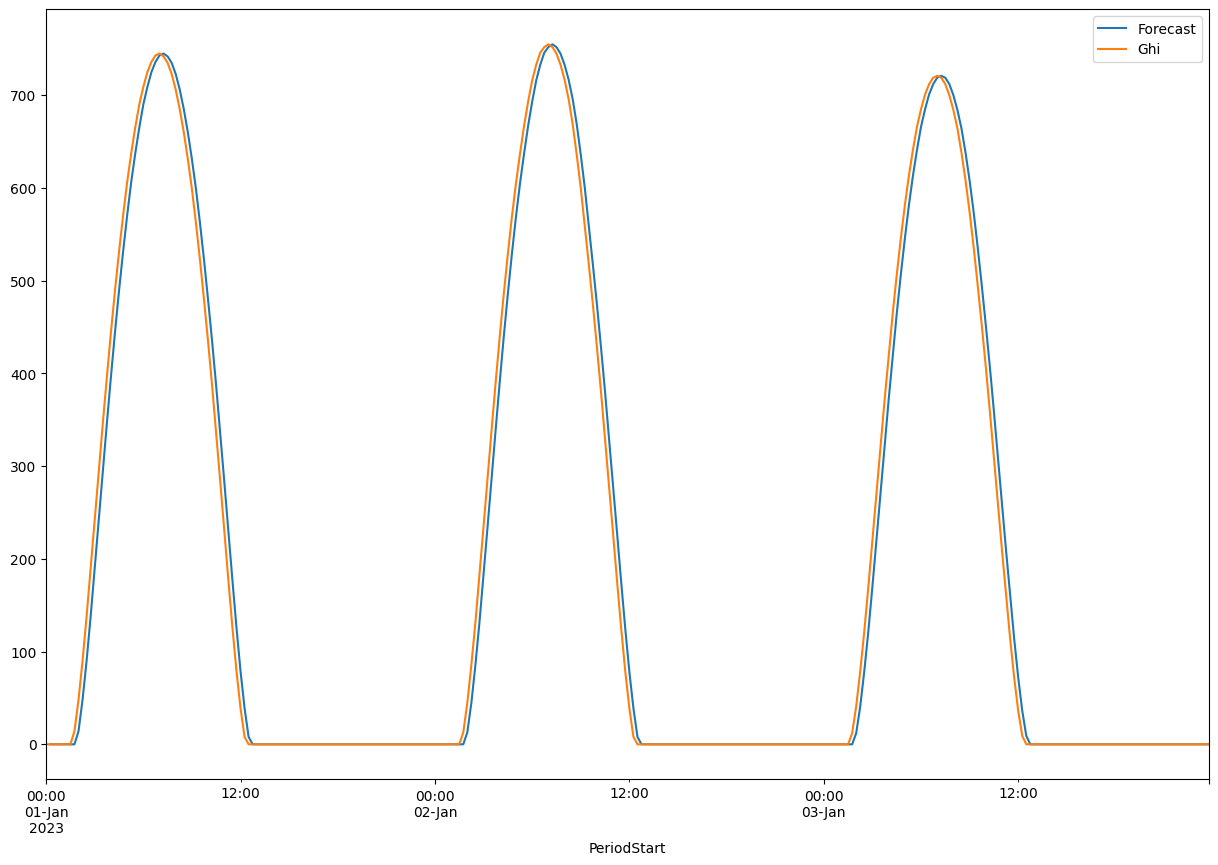

In [ ]:
df_per_sak.set_index('PeriodStart')[['Forecast','Ghi']].iloc[0:96*3].plot(figsize=(15,10))

In [ ]:
df_per_sak.dropna(inplace=True)

In [ ]:
print("r2_Score",r2_score(df_per_sak['Forecast'],df_per_sak['Ghi']))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_per_sak['Forecast'],df_per_sak['Ghi'])))
print("Mean Absolute Error",mean_absolute_error(df_per_sak['Forecast'],df_per_sak['Ghi']))

r2_Score 0.9912337807214757
Root Mean Sqaured Error 27.89714547897903
Mean Absolute Error 16.944150298889838


## Transfer_Learning

### S1

#### 4

In [ ]:
p3_1=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_1.build_model_strategy_1()
p3_1.compile_model()
p3_1.fit_model(X_train_sak_4,y_train_sak_4,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S1_4.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 65
Non-trainable params: 1,060,608
_________________________________________________________________


NameError: ignored

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_1.predict(X_test_sak))
print("r2_Score",r2_score(p3_1.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 8

In [ ]:
p3_1=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_1.build_model_strategy_1()
p3_1.compile_model()
p3_1.fit_model(X_train_sak_8,y_train_sak_8,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S1_8.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_1.predict(X_test_sak))
print("r2_Score",r2_score(p3_1.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 12

In [ ]:
p3_1=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_1.build_model_strategy_1()
p3_1.compile_model()
p3_1.fit_model(X_train_sak_12,y_train_sak_12,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S1_12.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_1.predict(X_test_sak))
print("r2_Score",r2_score(p3_1.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

### S2

#### 4

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.build_model_strategy_2()
p3_2.compile_model()
p3_2.fit_model(X_train_sak_4,y_train_sak_4,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S2_4.h5')

In [ ]:

df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_2.predict(X_test_sak))
print("r2_Score",r2_score(p3_2.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 8

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.build_model_strategy_2()
p3_2.compile_model()
p3_2.fit_model(X_train_sak_8,y_train_sak_8,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S2_8.h5')

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.load_trained_model('/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S2_8.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_2.predict(X_test_sak))
print("r2_Score",r2_score(p3_2.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 12

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.build_model_strategy_2()
p3_2.compile_model()
p3_2.fit_model(X_train_sak_12,y_train_sak_12,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S2_12.h5')

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.load_trained_model('/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S2_12.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_2.predict(X_test_sak))
print("r2_Score",r2_score(p3_2.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

### S3

#### 4

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.build_model_strategy_3()
p3_3.compile_model()
p3_3.fit_model(X_train_sak_4,y_train_sak_4,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S3_4.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_3.predict(X_test_sak))
print("r2_Score",r2_score(p3_3.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 8

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.build_model_strategy_3()
p3_3.compile_model()
p3_3.fit_model(X_train_sak_8,y_train_sak_8,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S3_8.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_3.predict(X_test_sak))
print("r2_Score",r2_score(p3_3.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 12

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.build_model_strategy_3()
p3_3.compile_model()
p3_3.fit_model(X_train_sak_12,y_train_sak_12,X_test_sak,y_test_sak,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S3_12.h5')

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.load_trained_model('/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S3_12.h5')

In [ ]:
df_test_date_sak['Actual']=scaler_y_sak.inverse_transform(y_test_sak)
df_test_date_sak['Predicted']=scaler_y_sak.inverse_transform(p3_3.predict(X_test_sak))
print("r2_Score",r2_score(p3_3.predict(X_test_sak),y_test_sak))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_sak['Actual'],df_test_date_sak['Predicted']))
df_test_date_sak.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

# TAN_1

## Bi-LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

class SolarPowerForecastingModel:

    def __init__(self, n_timesteps, n_features, n_outputs,Model=None):
        self.n_timesteps = n_timesteps
        self.n_features = n_features
        self.n_outputs = n_outputs
        self.model = Model
        
    def build_model(self):
        self.model = Sequential()
        self.model.add(Bidirectional(LSTM(units=640,return_sequences=True,input_shape=(self.n_timesteps, self.n_features))))
        self.model.add(Bidirectional(LSTM(units=64)))
        self.model.add(Dense(self.n_outputs))
        self.model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001), metrics=['mae'])
        return self.model
    def train_model(self, X_train, y_train, X_test, y_test, epochs, batch_size):
        mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/Bi-LSTM/Best_base.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2, mode='min', restore_best_weights=True)
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping,mc])

    def load_trained_model(self, path):
        self.model = load_model(path)

    def save_trained_model(self, path):
        self.model.save(path)
    
    def predict(self, X):
        return self.model.predict(X)


In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
best_model.build_model()
best_model.train_model(X_train_tan_4, y_train_tan_4, X_test_tan, y_test_tan, epochs=250, batch_size=128)

# Print the model summary
best_model.model.summary()

Epoch 1/250
92/92 [==============================] - ETA: 0s - loss: 0.0501 - mae: 0.1024
Epoch 1: val_loss improved from inf to 0.00247, saving model to /content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/Bi-LSTM/Best_base.h5
92/92 [==============================] - 28s 141ms/step - loss: 0.0501 - mae: 0.1024 - val_loss: 0.0025 - val_mae: 0.0437
Epoch 2/250
92/92 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0309
Epoch 2: val_loss improved from 0.00247 to 0.00205, saving model to /content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/Bi-LSTM/Best_base.h5
92/92 [==============================] - 12s 133ms/step - loss: 0.0021 - mae: 0.0309 - val_loss: 0.0020 - val_mae: 0.0394
Epoch 3/250
92/92 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0244
Epoch 3: val_loss did not improve from 0.00205
92/92 [==============================] - 12s 127ms/step - loss: 0.0015 - mae: 0.0244 - val_loss: 0.0024 - val_mae: 0.0408
Epoch

181/181 [==============================] - 4s 18ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

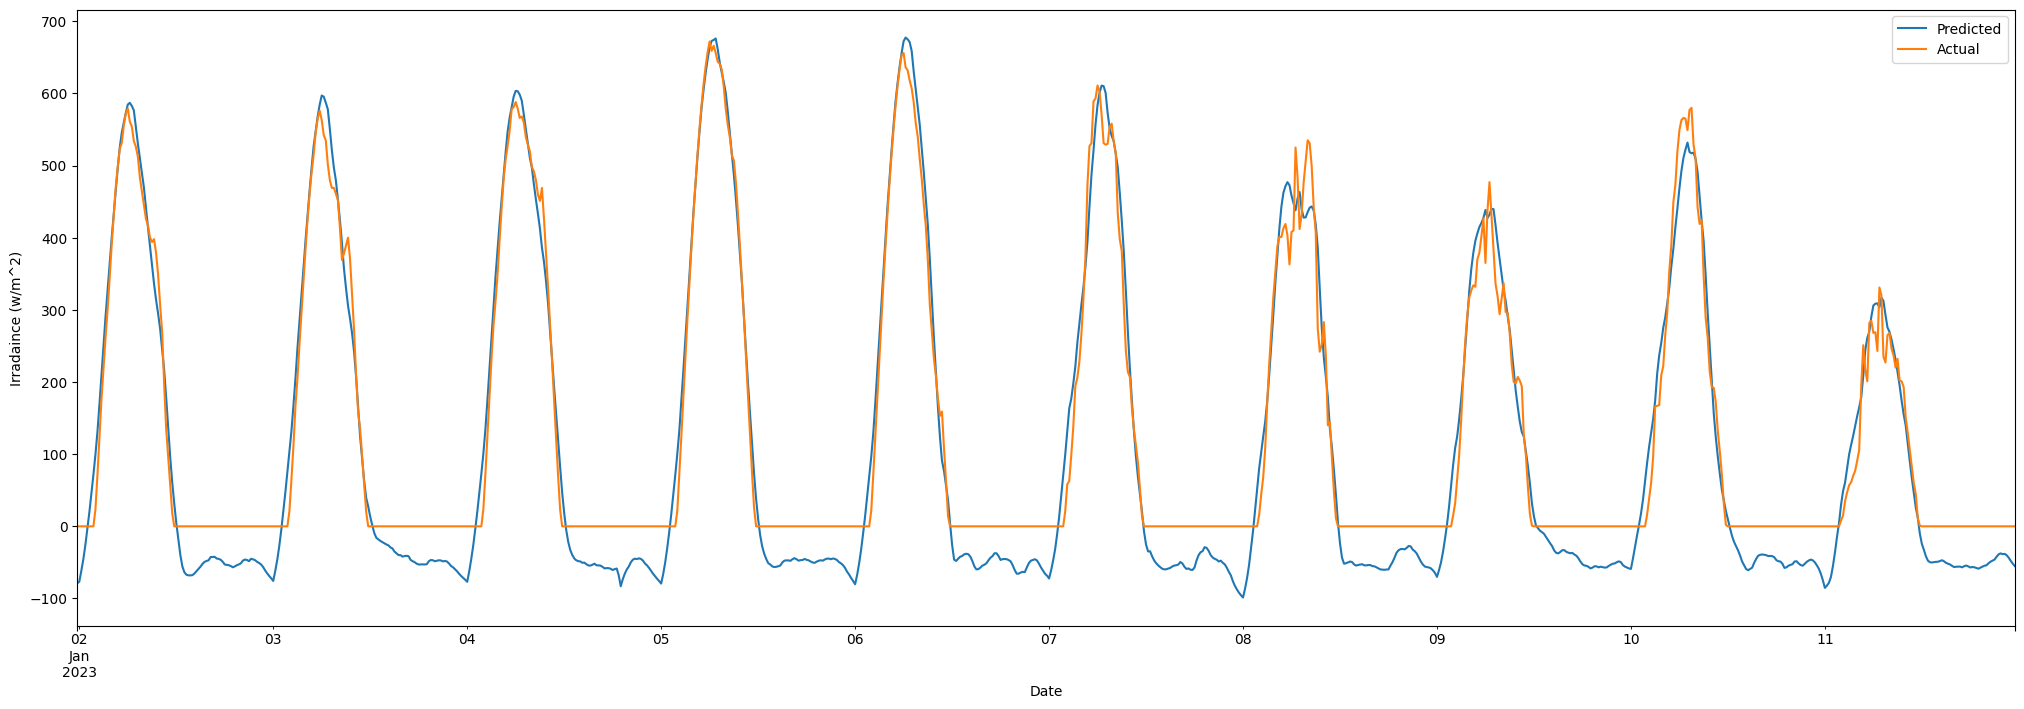

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(best_model.predict(X_test_tan))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))

181/181 [==============================] - 3s 17ms/step
r2_Score 0.9449901031424595
Root Mean Sqaured Error 56.588387
Mean Absolute Error 48.237843


In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
best_model.build_model()
best_model.train_model(X_train_tan_8, y_train_tan_8, X_test_tan, y_test_tan, epochs=250, batch_size=128)

# Print the model summary
best_model.model.summary()

Epoch 1/250
165/165 [==============================] - ETA: 0s - loss: 0.0262 - mae: 0.0717
Epoch 1: val_loss improved from inf to 0.00183, saving model to /content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/Bi-LSTM/Best_base.h5
165/165 [==============================] - 33s 153ms/step - loss: 0.0262 - mae: 0.0717 - val_loss: 0.0018 - val_mae: 0.0352
Epoch 2/250
165/165 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0283
Epoch 2: val_loss did not improve from 0.00183
165/165 [==============================] - 22s 132ms/step - loss: 0.0019 - mae: 0.0283 - val_loss: 0.0020 - val_mae: 0.0364
Epoch 3/250
165/165 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0249
Epoch 3: val_loss improved from 0.00183 to 0.00134, saving model to /content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/Bi-LSTM/Best_base.h5
165/165 [==============================] - 21s 130ms/step - loss: 0.0016 - mae: 0.0249 - val_loss: 0.0013 - val_mae: 

181/181 [==============================] - 4s 18ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

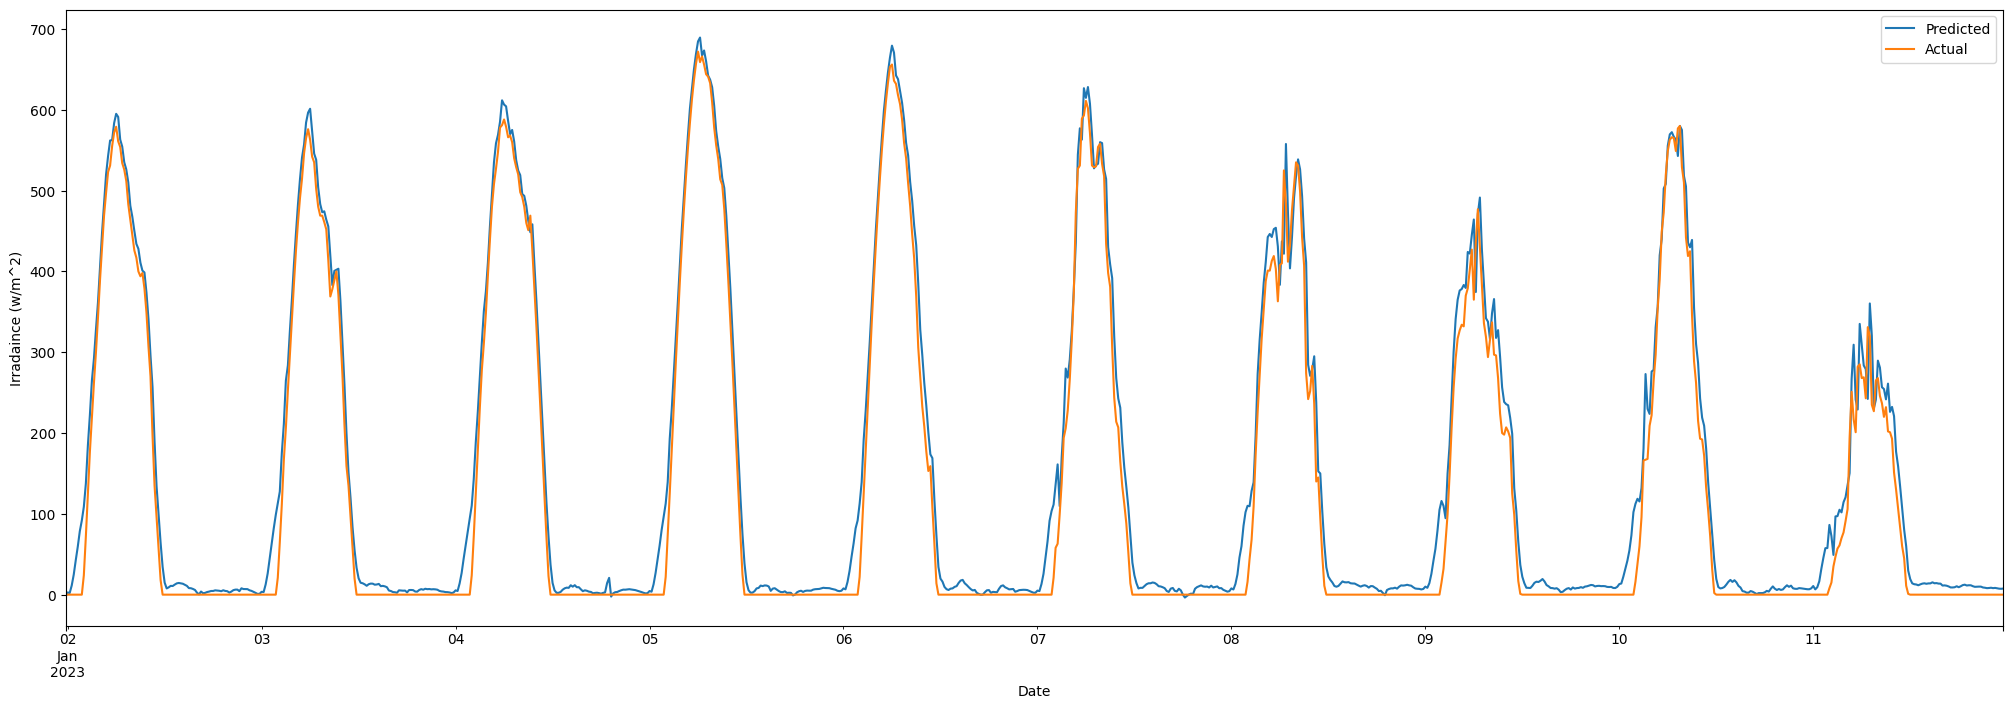

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(best_model.predict(X_test_tan))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))

181/181 [==============================] - 3s 18ms/step
r2_Score 0.9809141994295097
Root Mean Sqaured Error 31.198559
Mean Absolute Error 19.140951


In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
best_model.build_model()
best_model.train_model(X_train_tan_12, y_train_tan_12, X_test_tan, y_test_tan, epochs=250, batch_size=128)

# Print the model summary
best_model.model.summary()

Epoch 1/250
219/219 [==============================] - ETA: 0s - loss: 0.0244 - mae: 0.0636
Epoch 1: val_loss improved from inf to 0.00131, saving model to /content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/Bi-LSTM/Best_base.h5
219/219 [==============================] - 40s 143ms/step - loss: 0.0244 - mae: 0.0636 - val_loss: 0.0013 - val_mae: 0.0293
Epoch 2/250
219/219 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0246
Epoch 2: val_loss did not improve from 0.00131
219/219 [==============================] - 28s 126ms/step - loss: 0.0016 - mae: 0.0246 - val_loss: 0.0017 - val_mae: 0.0326
Epoch 3/250
219/219 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0210
Epoch 3: val_loss did not improve from 0.00131
219/219 [==============================] - 27s 125ms/step - loss: 0.0012 - mae: 0.0210 - val_loss: 0.0019 - val_mae: 0.0350
Epoch 4/250
219/219 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0188
Epoch 4: val

181/181 [==============================] - 4s 18ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

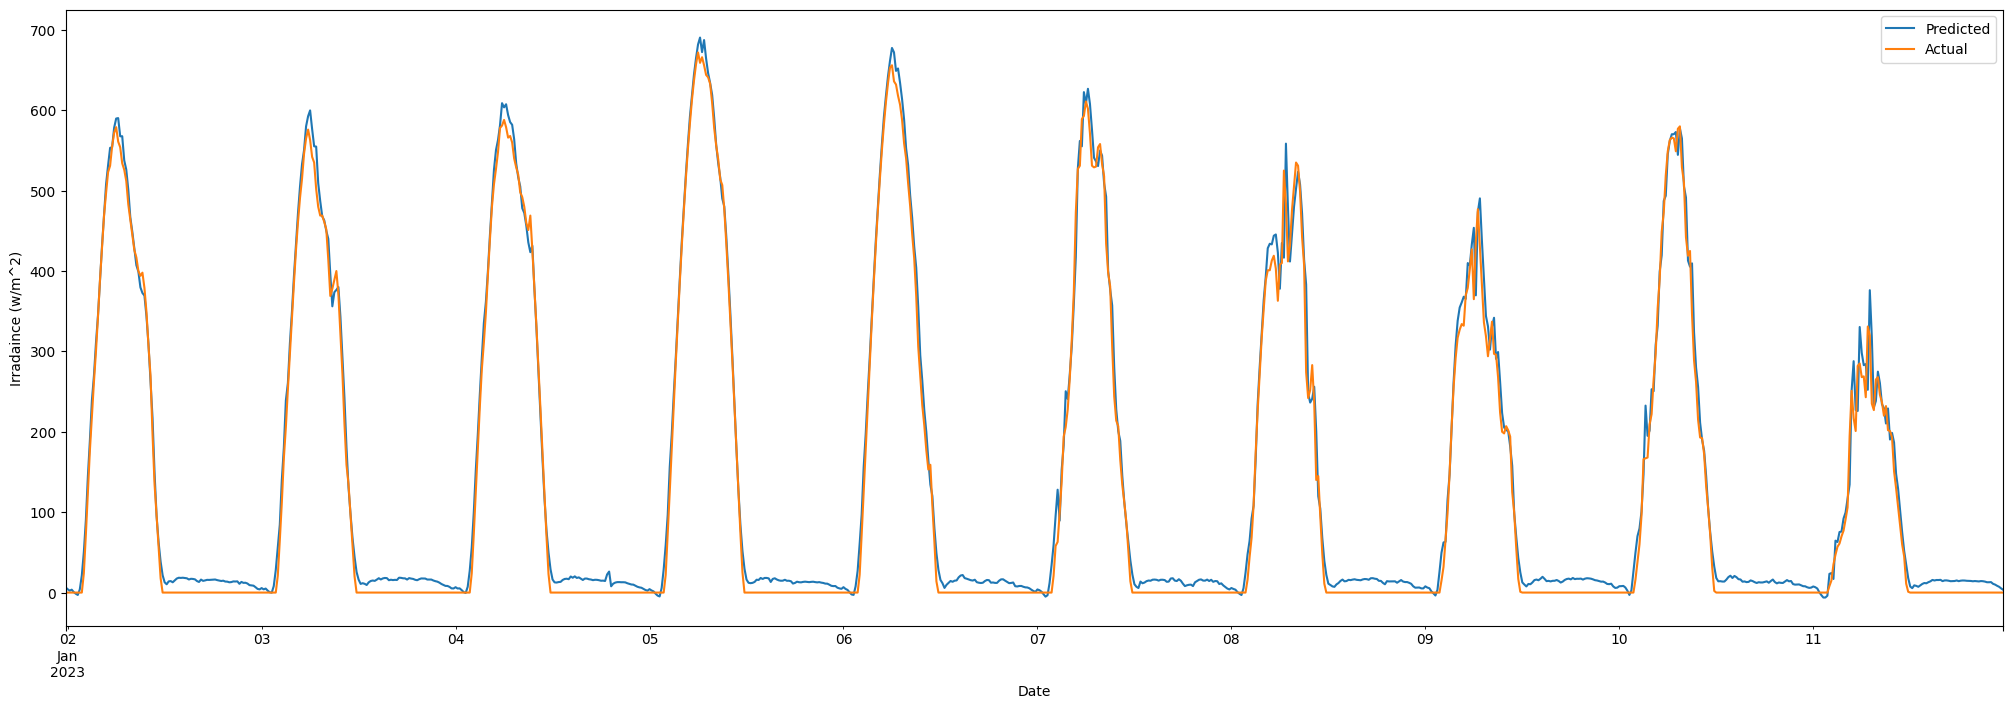

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(best_model.predict(X_test_tan))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))

181/181 [==============================] - 3s 18ms/step
r2_Score 0.9835597999019513
Root Mean Sqaured Error 29.579561
Mean Absolute Error 20.09429


## Persistance model

In [ ]:
tan

,PeriodStart,AirTemp,Azimuth,CloudOpacity,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sin_hour,cos_hour,Ghi
0,2020-12-31 00:00:00+00:00,-33.5,-104,0.1,0.3,94.3,517.5,94,1.5,111,...,0,0,0,0,0,0,1,0.000000,1.000000,0
1,2020-12-31 00:15:00+00:00,-33.5,-106,0.8,0.3,94.3,517.5,94,1.5,108,...,0,0,0,0,0,0,1,0.000000,1.000000,0
2,2020-12-31 00:30:00+00:00,-33.6,-108,2.1,0.3,94.3,517.5,94,1.5,105,...,0,0,0,0,0,0,1,0.000000,1.000000,0
3,2020-12-31 00:45:00+00:00,-33.6,-110,0.1,0.3,94.3,517.5,94,1.5,102,...,0,0,0,0,0,0,1,0.000000,1.000000,0
4,2020-12-31 01:00:00+00:00,-33.7,-112,0.0,0.3,94.4,517.6,94,1.5,99,...,0,0,0,0,0,0,1,0.258819,0.965926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76027,2023-03-02 22:45:00+00:00,-17.7,-78,0.0,1.7,83.1,521.0,105,1.1,121,...,0,0,0,0,0,0,0,-0.500000,0.866025,0
76028,2023-03-02 23:00:00+00:00,-18.0,-80,0.0,1.7,82.5,521.0,105,1.2,118,...,0,0,0,0,0,0,0,-0.258819,0.965926,0
76029,2023-03-02 23:15:00+00:00,-18.3,-82,0.0,1.6,81.8,521.1,105,1.2,114,...,0,0,0,0,0,0,0,-0.258819,0.965926,0
76030,2023-03-02 23:30:00+00:00,-18.7,-85,0.0,1.6,81.0,521.2,104,1.2,111,...,0,0,0,0,0,0,0,-0.258819,0.965926,0


In [ ]:
per_start = "2023-01-01T23:45:00Z"
# Convert the 'PeriodStart' column to a datetime format
# sak['PeriodStart'] = pd.to_datetime(df_sak['PeriodStart'])
df_per_tan =pd.DataFrame()
# Split the data into train and test sets based on the date and time range
df_per_tan = tan[tan['PeriodStart'] > test_start][['PeriodStart','Ghi']]

In [ ]:
df_per_tan

,PeriodStart,Ghi
70176,2023-01-01 00:00:00+00:00,0
70177,2023-01-01 00:15:00+00:00,0
70178,2023-01-01 00:30:00+00:00,0
70179,2023-01-01 00:45:00+00:00,0
70180,2023-01-01 01:00:00+00:00,0
...,...,...
76027,2023-03-02 22:45:00+00:00,0
76028,2023-03-02 23:00:00+00:00,0
76029,2023-03-02 23:15:00+00:00,0
76030,2023-03-02 23:30:00+00:00,0


In [ ]:
import pandas as pd

def persistence_model(data, look_back=1, horizon=1):
    """
    Implementation of the Persistence model for solar irradiance forecasting.
    
    Parameters:
    data (pd.Series): A pandas Series containing the solar irradiance time series data.
    look_back (int): The number of previous time steps to use for the prediction (default: 1).
    horizon (int): The number of time steps ahead to predict (default: 1).
    
    Returns:
    pd.Series: A pandas Series containing the solar irradiance forecast.
    """
    return data.shift(horizon * look_back)

# Load your solar irradiance time series data into a pandas Series
# data = pd.read_csv('your_data_file.csv', index_col='timestamp', parse_dates=True, squeeze=True)

# Example solar irradiance data
data =df_per_tan
# Apply the Persistence model
forecast = persistence_model(data)



In [ ]:
df_per_tan['Forecast']=forecast['Ghi']

<Axes: xlabel='PeriodStart'>

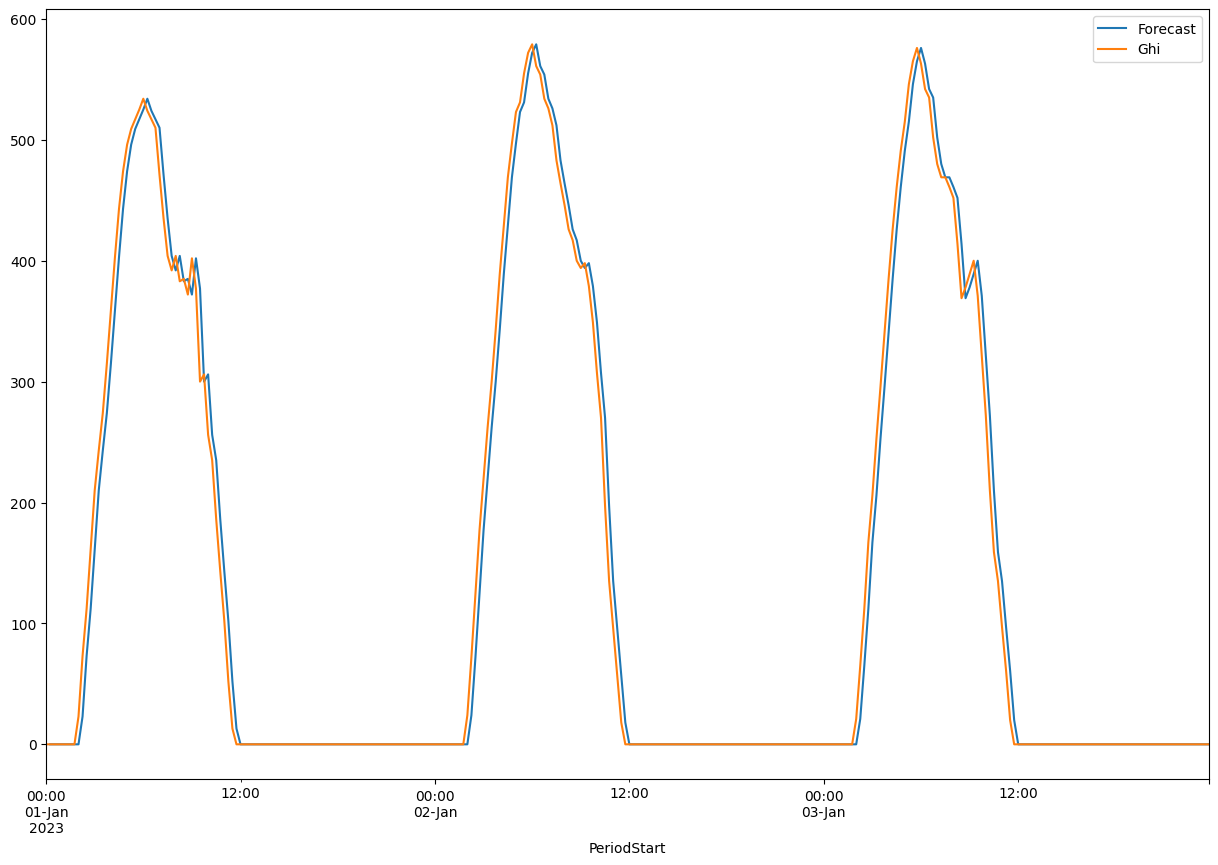

In [ ]:
df_per_tan.set_index('PeriodStart')[['Forecast','Ghi']].iloc[0:96*3].plot(figsize=(15,10))

In [ ]:
df_per_tan.dropna(inplace=True)

In [ ]:
print("r2_Score",r2_score(df_per_tan['Forecast'],df_per_tan['Ghi']))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_per_tan['Forecast'],df_per_tan['Ghi'])))
print("Mean Absolute Error",mean_absolute_error(df_per_tan['Forecast'],df_per_tan['Ghi']))

r2_Score 0.9808803318821675
Root Mean Sqaured Error 31.923590457037555
Mean Absolute Error 16.663364645602048


## Transfer_Learning

### S1

#### 4

In [ ]:
p3_1=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_1.build_model_strategy_1()
p3_1.compile_model()
p3_1.fit_model(X_train_tan_4,y_train_tan_4,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/S1_4.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 65
Non-trainable params: 1,060,608
_________________________________________________________________
Epoch 1/250
91/92 [============================>.] - ETA: 0s - loss: 6.5188e-04
Epoch 1: val_loss improved from inf to 0.00013, saving model to /content/drive/MyDrive/Generali

181/181 [==============================] - 2s 8ms/step
r2_Score 0.9880648549012377
Root Mean Sqaured Error 25.517881
Mean Absolute Error 13.074716


Text(0, 0.5, 'Irradiance (W/m^2)')

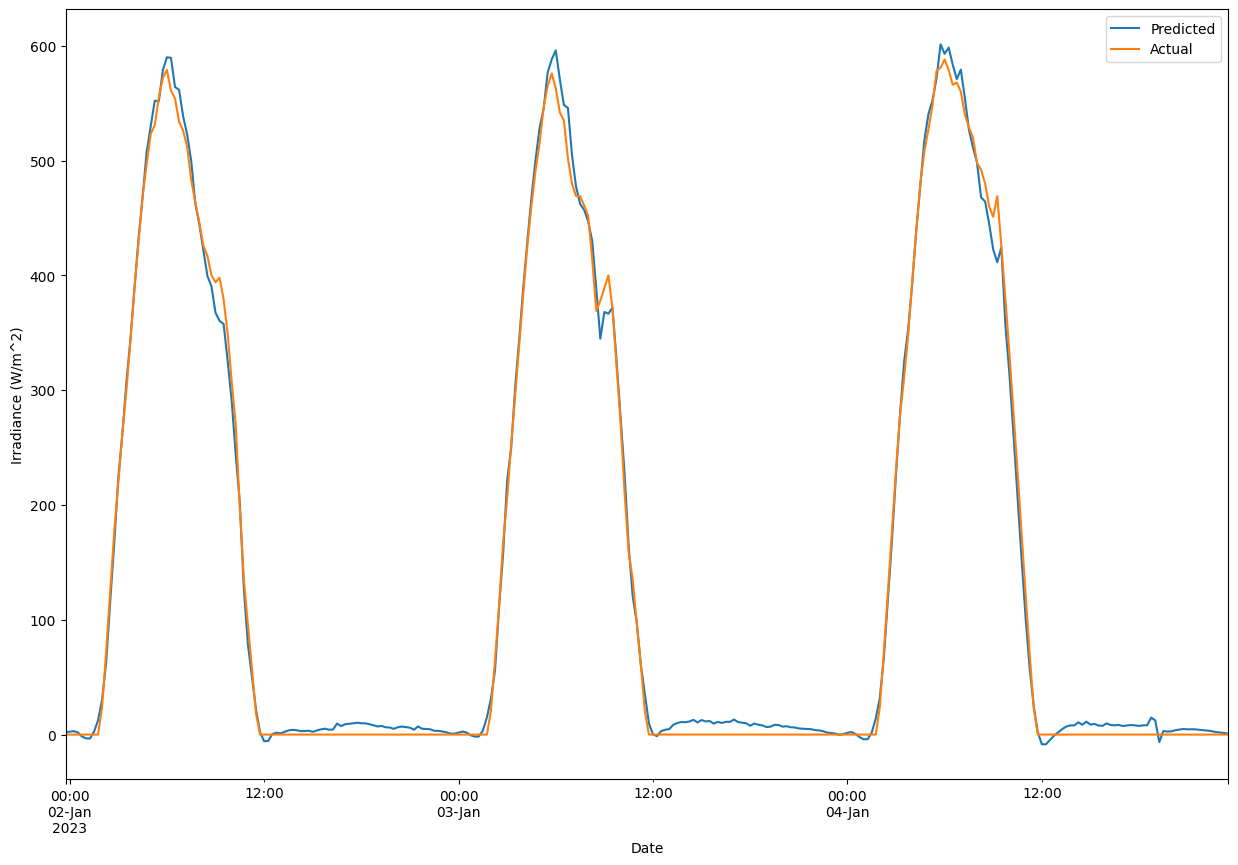

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_1.predict(X_test_tan))
print("r2_Score",r2_score(p3_1.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 8

In [ ]:
p3_1=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_1.build_model_strategy_1()
p3_1.compile_model()
p3_1.fit_model(X_train_tan_8,y_train_tan_8,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/tanri Solar Plant/S1_8.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 65
Non-trainable params: 1,060,608
_________________________________________________________________
Epoch 1/250
163/165 [============================>.] - ETA: 0s - loss: 7.5118e-04
Epoch 1: val_loss improved from inf to 0.00017, saving model to /content/drive/MyDrive/Genera

181/181 [==============================] - 2s 8ms/step
r2_Score 0.9883003719463083
Root Mean Sqaured Error 25.371601
Mean Absolute Error 12.7340145


Text(0, 0.5, 'Irradiance (W/m^2)')

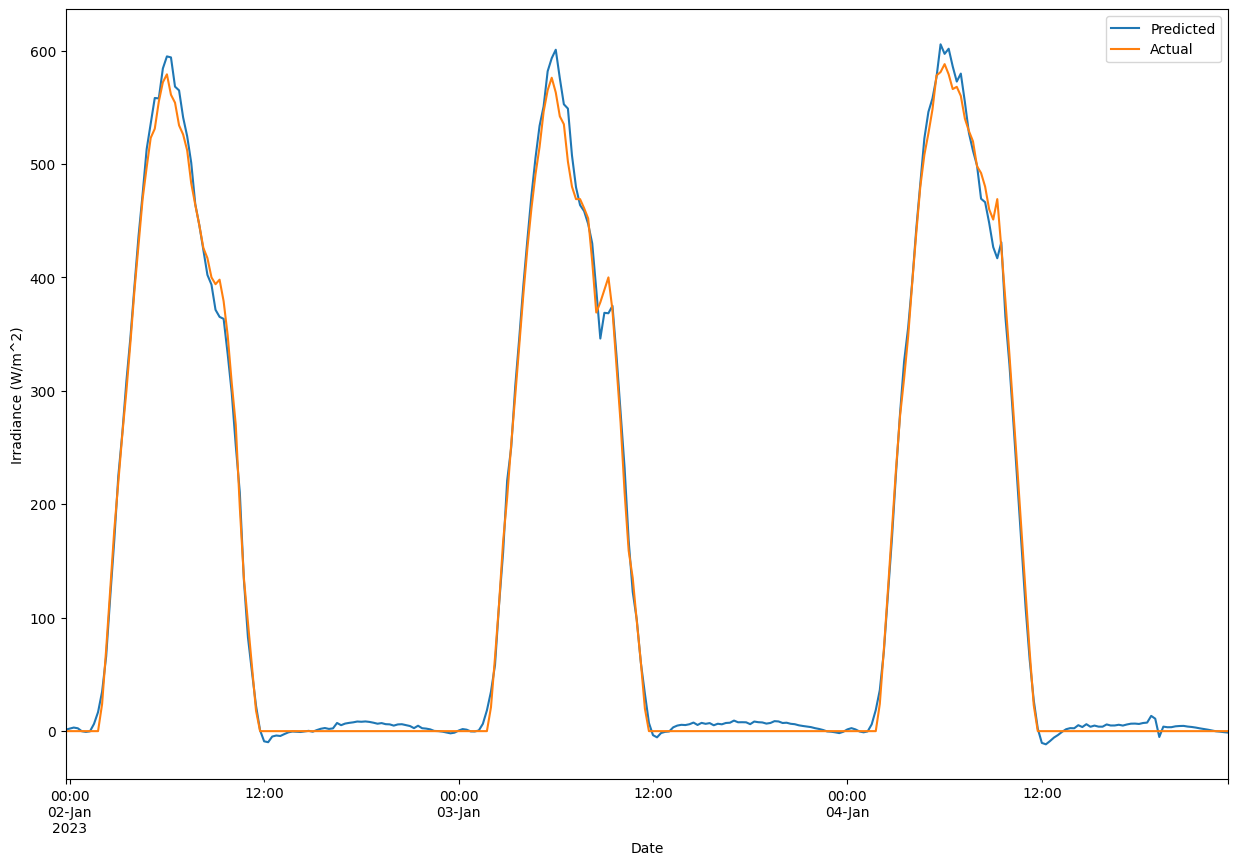

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_1.predict(X_test_tan))
print("r2_Score",r2_score(p3_1.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 12

In [ ]:
p3_1=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_1.build_model_strategy_1()
p3_1.compile_model()
p3_1.fit_model(X_train_tan_12,y_train_tan_12,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/S1_12.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 65
Non-trainable params: 1,060,608
_________________________________________________________________
Epoch 1/250
218/219 [============================>.] - ETA: 0s - loss: 6.4535e-04
Epoch 1: val_loss improved from inf to 0.00018, saving model to /content/drive/MyDrive/Genera

181/181 [==============================] - 1s 8ms/step
r2_Score 0.9887173238663992
Root Mean Sqaured Error 24.806944
Mean Absolute Error 11.956592


Text(0, 0.5, 'Irradiance (W/m^2)')

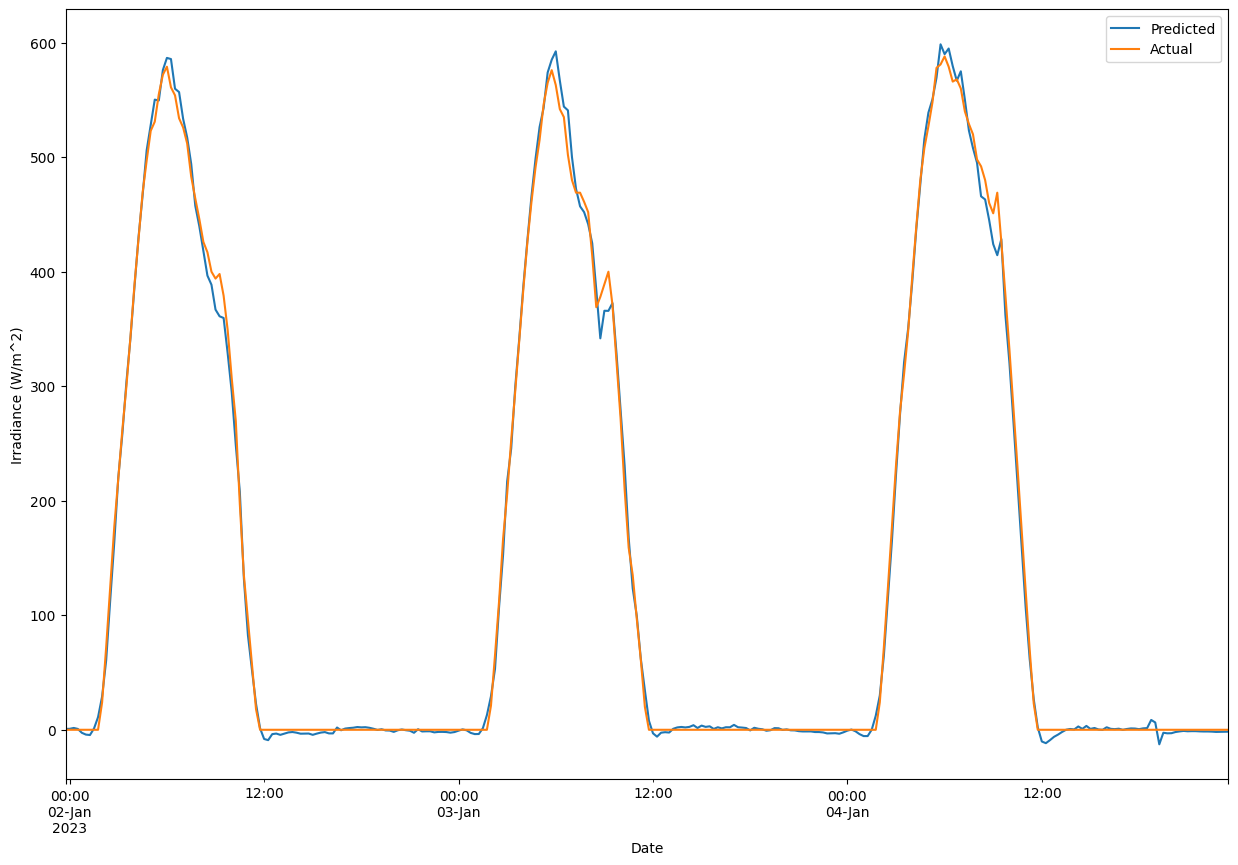

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_1.predict(X_test_tan))
print("r2_Score",r2_score(p3_1.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

### S2

#### 4

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.build_model_strategy_2()
p3_2.compile_model()
p3_2.fit_model(X_train_tan_4,y_train_tan_4,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/S2_4.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 1,060,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
92/92 [==============================] - ETA: 0s - loss: 9.2666e-04
Epoch 1: val_loss improved from inf to 0.00028, saving model to /content/drive/MyDrive/Generaliz

181/181 [==============================] - 2s 9ms/step
r2_Score 0.9885500285088198
Root Mean Sqaured Error 24.914436
Mean Absolute Error 12.538079


Text(0, 0.5, 'Irradiance (W/m^2)')

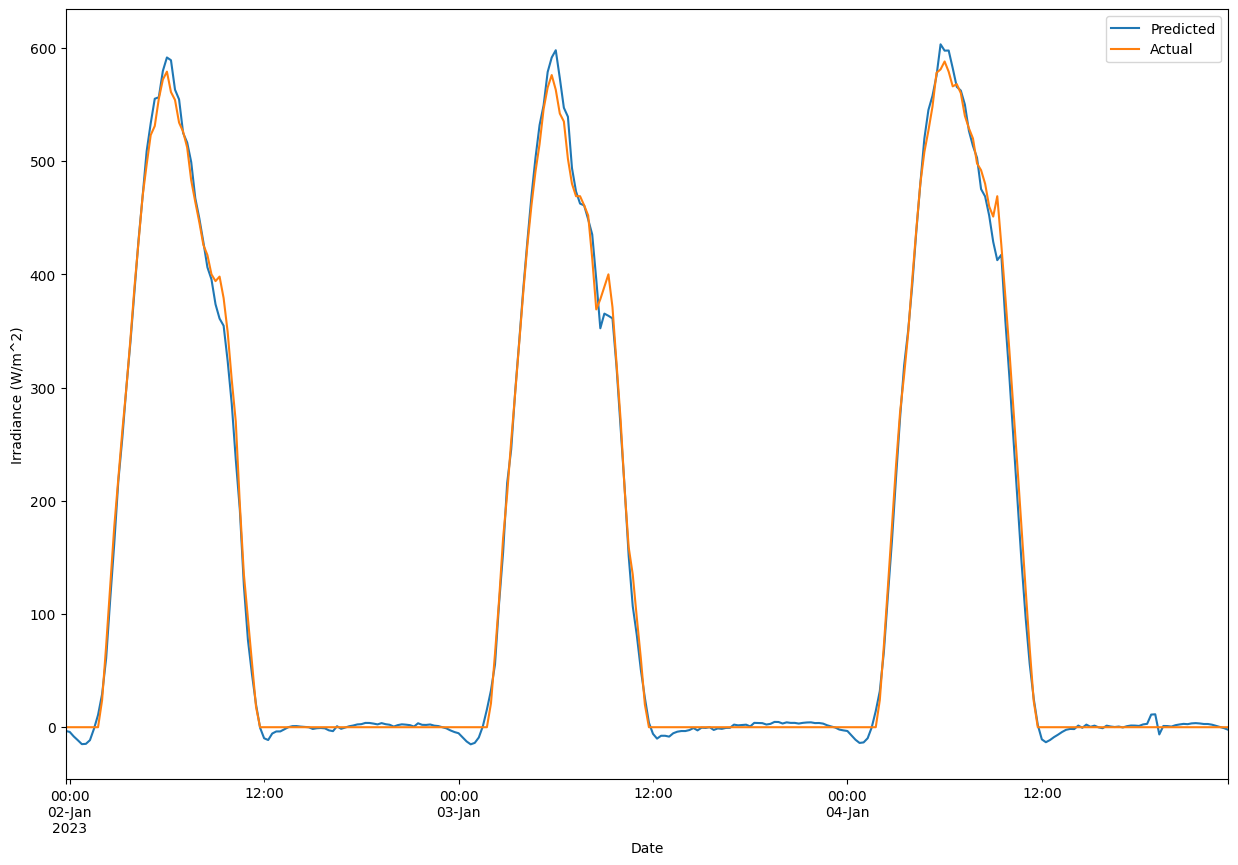

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_2.predict(X_test_tan))
print("r2_Score",r2_score(p3_2.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 8

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.build_model_strategy_2()
p3_2.compile_model()
p3_2.fit_model(X_train_tan_8,y_train_tan_8,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/S2_8.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 1,060,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
165/165 [==============================] - ETA: 0s - loss: 9.2626e-04
Epoch 1: val_loss improved from inf to 0.00017, saving model to /content/drive/MyDrive/General

181/181 [==============================] - 2s 8ms/step
r2_Score 0.9881693630363566
Root Mean Sqaured Error 25.42224
Mean Absolute Error 12.863684


Text(0, 0.5, 'Irradiance (W/m^2)')

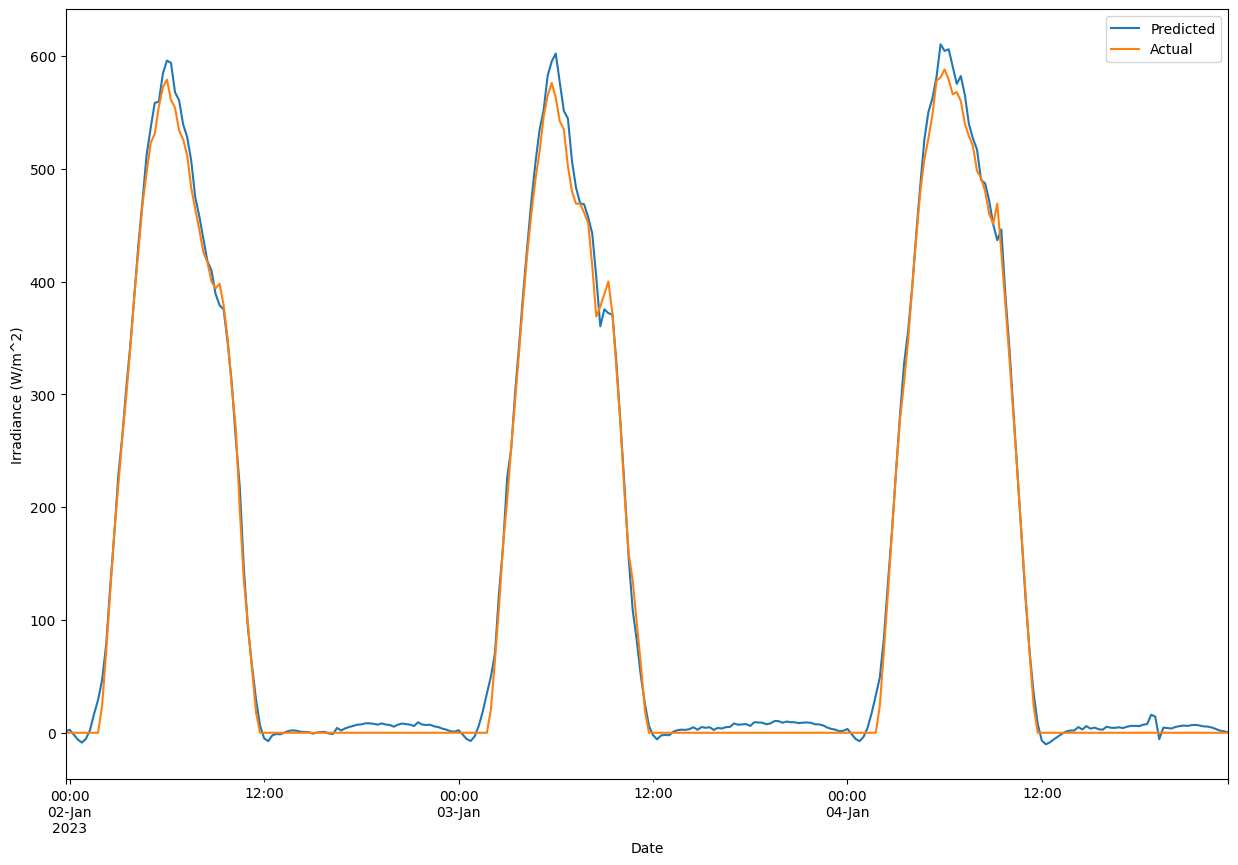

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_2.predict(X_test_tan))
print("r2_Score",r2_score(p3_2.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 12

In [ ]:
p3_2=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_2.build_model_strategy_2()
p3_2.compile_model()
p3_2.fit_model(X_train_tan_12,y_train_tan_12,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/S2_12.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 1,060,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
218/219 [============================>.] - ETA: 0s - loss: 7.5953e-04
Epoch 1: val_loss improved from inf to 0.00033, saving model to /content/drive/MyDrive/General

181/181 [==============================] - 2s 8ms/step
r2_Score 0.9857088272998334
Root Mean Sqaured Error 28.135618
Mean Absolute Error 17.34778


Text(0, 0.5, 'Irradiance (W/m^2)')

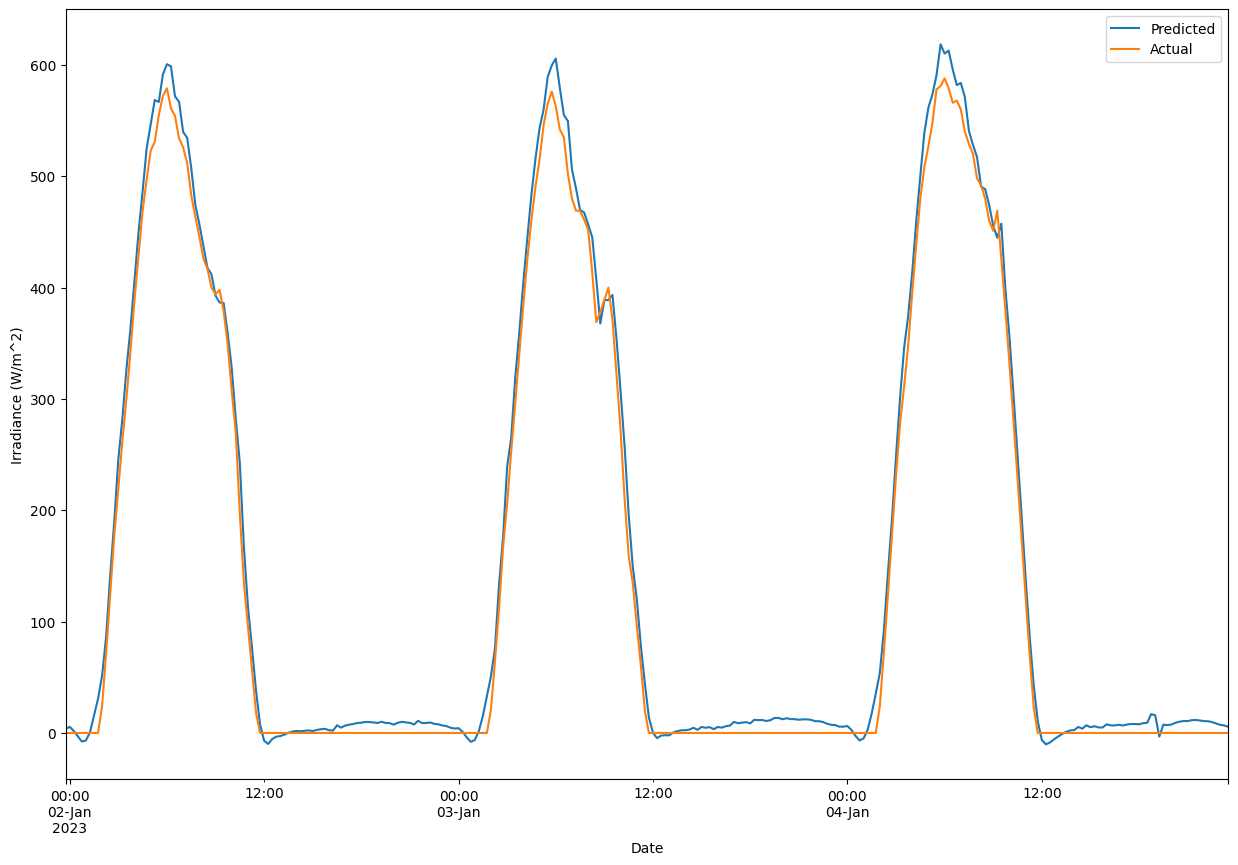

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_2.predict(X_test_tan))
print("r2_Score",r2_score(p3_2.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

### S3

#### 4

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.build_model_strategy_3()
p3_3.compile_model()
p3_3.fit_model(X_train_tan_4,y_train_tan_4,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/S3_4.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2_input (Inpu  [(None, 96, 26)]         0         
 tLayer)                                                         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 172,353
Non-trainable params: 888,320
_______________________________________________

181/181 [==============================] - 2s 8ms/step
r2_Score 0.9785530890049345
Root Mean Sqaured Error 31.550776
Mean Absolute Error 22.904064


Text(0, 0.5, 'Irradiance (W/m^2)')

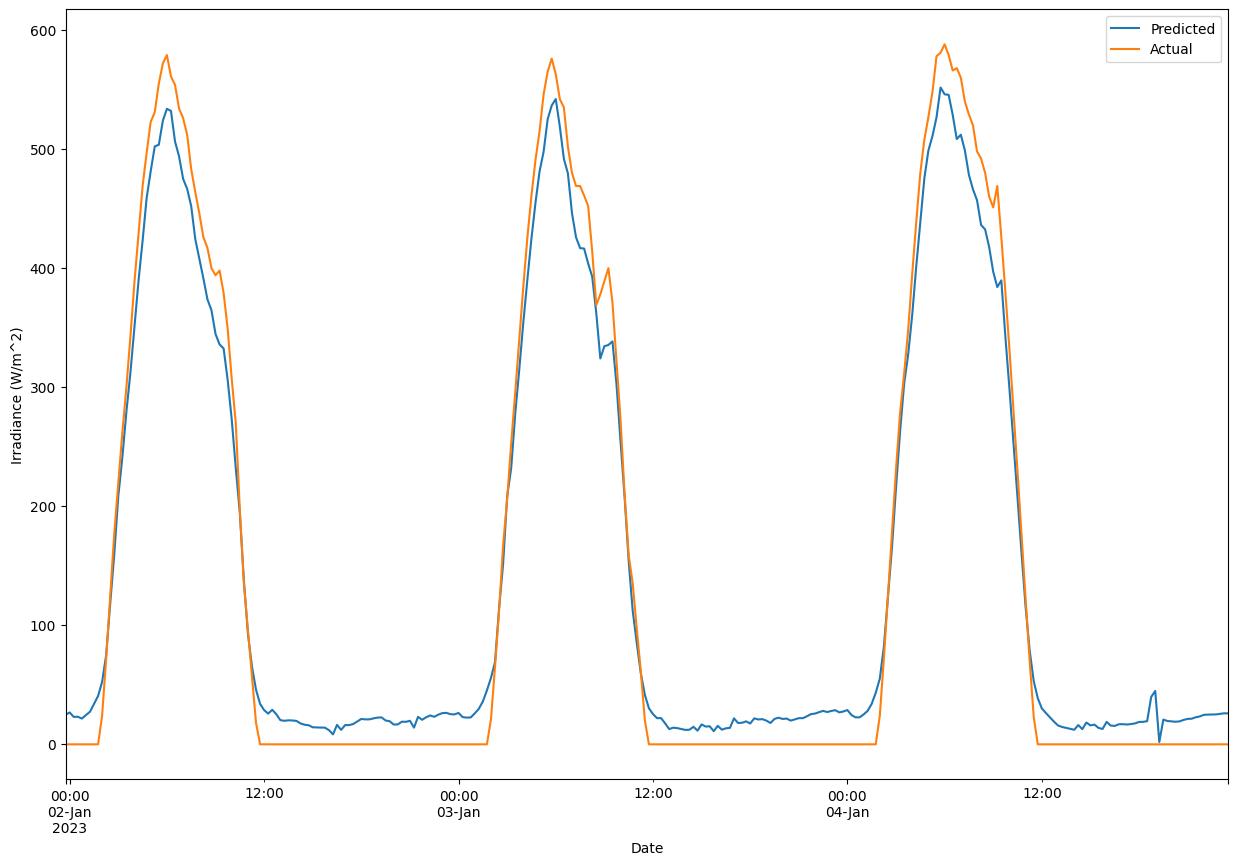

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_3.predict(X_test_tan))
print("r2_Score",r2_score(p3_3.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 8

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.build_model_strategy_3()
p3_3.compile_model()
p3_3.fit_model(X_train_tan_8,y_train_tan_8,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/S3_8.h5')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2_input (Inpu  [(None, 96, 26)]         0         
 tLayer)                                                         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 172,353
Non-trainable params: 888,320
_____________________________________________

181/181 [==============================] - 2s 8ms/step
r2_Score 0.9788989761282186
Root Mean Sqaured Error 33.1822
Mean Absolute Error 25.811876


Text(0, 0.5, 'Irradiance (W/m^2)')

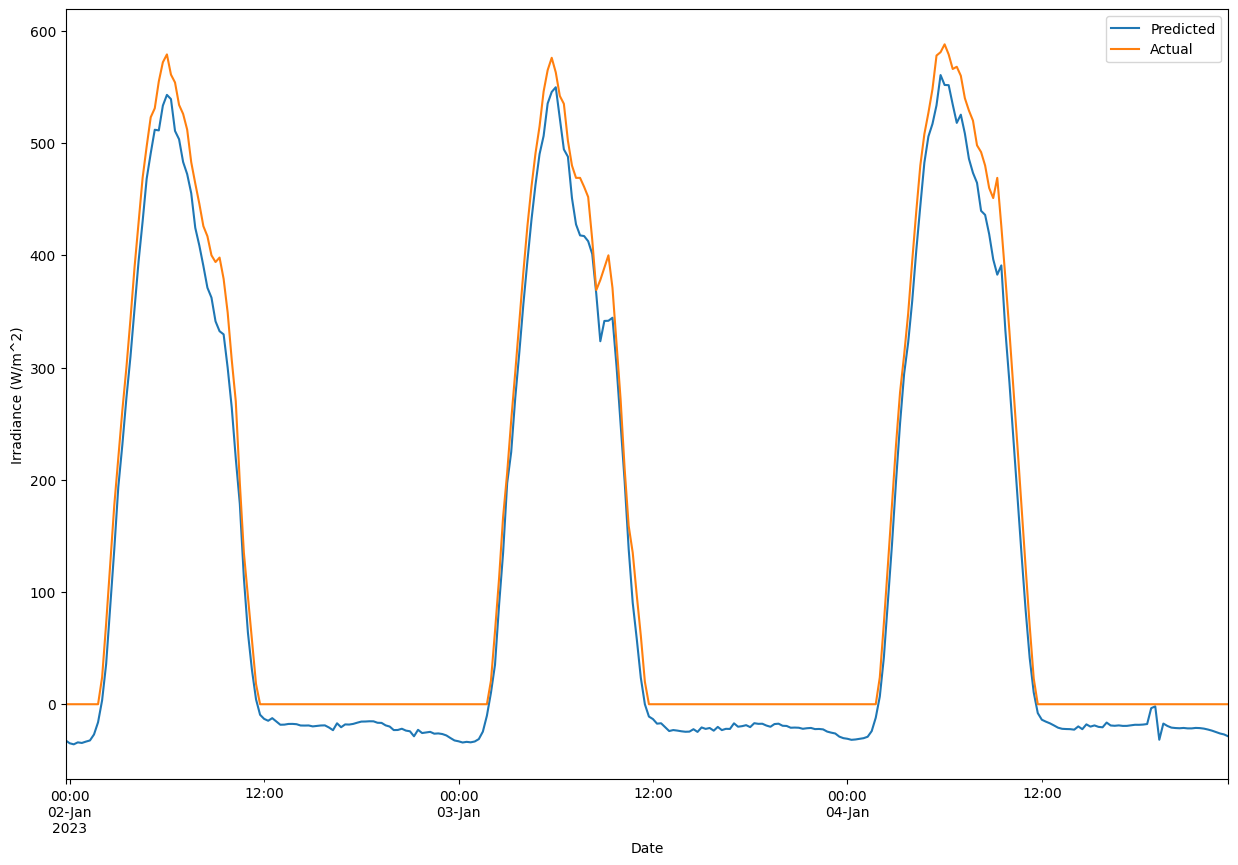

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_3.predict(X_test_tan))
print("r2_Score",r2_score(p3_3.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')

#### 12

In [ ]:
p3_3=TransferLearningModel('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5',[''],n_timesteps,n_features,n_outputs)
p3_3.build_model_strategy_3()
p3_3.compile_model()
p3_3.fit_model(X_train_tan_12,y_train_tan_12,X_test_tan,y_test_tan,epochs=250,batch_size=128,checkpoint_path='/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/S3_12.h5')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2_input (Inpu  [(None, 96, 26)]         0         
 tLayer)                                                         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 172,353
Non-trainable params: 888,320
_____________________________________________

181/181 [==============================] - 3s 18ms/step
r2_Score 0.988063430712475
Root Mean Sqaured Error 25.145584
Mean Absolute Error 13.204315


Text(0, 0.5, 'Irradiance (W/m^2)')

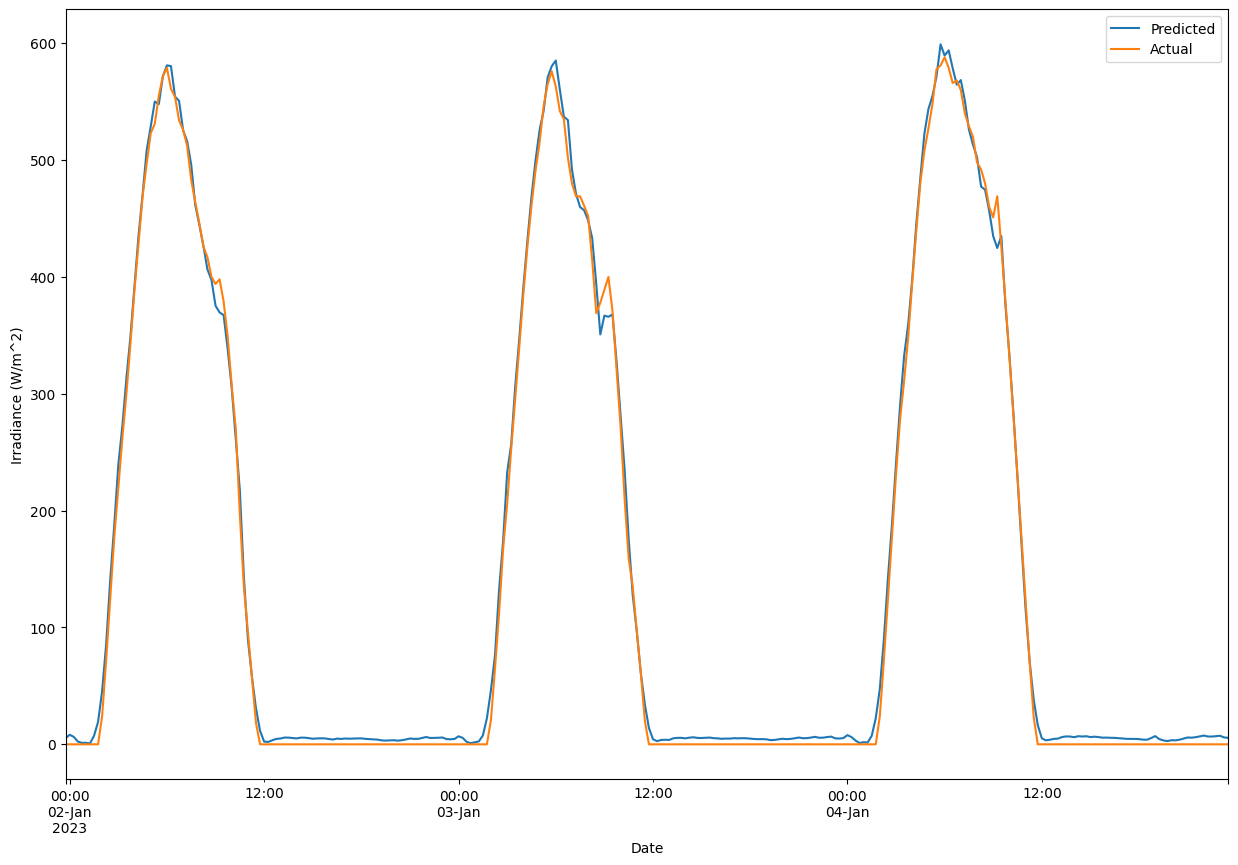

In [ ]:
df_test_date_tan['Actual']=scaler_y_tan.inverse_transform(y_test_tan)
df_test_date_tan['Predicted']=scaler_y_tan.inverse_transform(p3_3.predict(X_test_tan))
print("r2_Score",r2_score(p3_3.predict(X_test_tan),y_test_tan))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date_tan['Actual'],df_test_date_tan['Predicted']))
df_test_date_tan.set_index('Date')[['Predicted','Actual']].iloc[0:96*3].plot(figsize=(15,10))
plt.ylabel('Irradiance (W/m^2)')